In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from unipath import Path

#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

import itertools 


In [2]:
def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [3]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [4]:
rutabase = Path('/Users/ronaldverdugol/Desktop/Magister/6to/')

In [5]:
df = pd.concat(
    map(pd.read_csv, [rutabase +'1.csv', rutabase +'2.csv', rutabase +'3.csv']), ignore_index=True)
df.shape 

(90166, 34)

In [6]:
df.isnull().sum()

FECHA_VENTA               0
FECHACREACION             0
DESCRIPCION               0
CATEG_ID                  0
item_nbr                  0
item_desc_1               0
UNIDADES_VEND             0
MONTO_VENTA               0
TOTAL                  4017
INSTOCK                4017
QTY_ITEM_SUBCAT           0
MAXSHELF                228
CAPACIDAD_ESTANTE       228
EXISTENCIA               20
QUIEBRE_STOCK             0
BIN_QTY                   0
REPONER_QUIEBRE           0
LLENAR_GONDOLA            0
PISOVENTA                20
BACKROOM                 20
BIN_INCONSISTENCIAS       0
COM_BINS                  0
WHPK_QTY                228
QUIEBRE_COMP           5881
SALES_L3W                18
venta_quiebres            3
venta_llenado             0
venta_oostock             0
QUIEBRES_OPERACION        0
QUIEBRES_SUPPLY           0
QUIEBRES_COMERCIAL        0
QUIEBRES_OTROS            0
NUMERADOR_NSG             0
DENOMINADOR_NSG        2181
dtype: int64

In [7]:
df = df.drop(['QTY_ITEM_SUBCAT', 'TOTAL', 'QUIEBRE_COMP'], axis =1)

In [8]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

INSTOCK                4.455116
DENOMINADOR_NSG        2.418872
WHPK_QTY               0.252867
CAPACIDAD_ESTANTE      0.252867
MAXSHELF               0.252867
EXISTENCIA             0.022181
PISOVENTA              0.022181
BACKROOM               0.022181
SALES_L3W              0.019963
venta_quiebres         0.003327
QUIEBRES_SUPPLY        0.000000
QUIEBRES_OPERACION     0.000000
venta_oostock          0.000000
QUIEBRES_COMERCIAL     0.000000
COM_BINS               0.000000
QUIEBRES_OTROS         0.000000
venta_llenado          0.000000
NUMERADOR_NSG          0.000000
FECHA_VENTA            0.000000
BIN_INCONSISTENCIAS    0.000000
FECHACREACION          0.000000
REPONER_QUIEBRE        0.000000
BIN_QTY                0.000000
QUIEBRE_STOCK          0.000000
MONTO_VENTA            0.000000
UNIDADES_VEND          0.000000
item_desc_1            0.000000
item_nbr               0.000000
CATEG_ID               0.000000
DESCRIPCION            0.000000
LLENAR_GONDOLA         0.000000
dtype: f

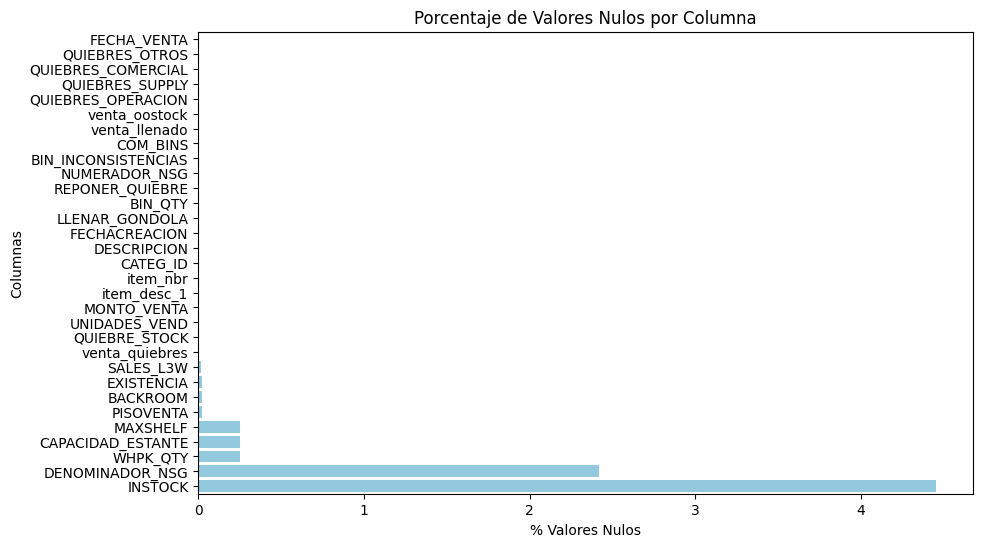

In [9]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [10]:
df.shape

(90166, 31)

In [11]:
df = df.dropna(how='all', axis = 1)

In [12]:
df.dtypes

FECHA_VENTA             object
FECHACREACION           object
DESCRIPCION             object
CATEG_ID                object
item_nbr                 int64
item_desc_1             object
UNIDADES_VEND            int64
MONTO_VENTA              int64
INSTOCK                float64
MAXSHELF               float64
CAPACIDAD_ESTANTE      float64
EXISTENCIA             float64
QUIEBRE_STOCK            int64
BIN_QTY                  int64
REPONER_QUIEBRE        float64
LLENAR_GONDOLA         float64
PISOVENTA              float64
BACKROOM               float64
BIN_INCONSISTENCIAS      int64
COM_BINS                 int64
WHPK_QTY               float64
SALES_L3W              float64
venta_quiebres         float64
venta_llenado            int64
venta_oostock            int64
QUIEBRES_OPERACION       int64
QUIEBRES_SUPPLY          int64
QUIEBRES_COMERCIAL       int64
QUIEBRES_OTROS           int64
NUMERADOR_NSG            int64
DENOMINADOR_NSG        float64
dtype: object

In [13]:
df['INSTOCK'].describe()

count    86149.000000
mean         0.985873
std          0.118014
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: INSTOCK, dtype: float64

In [14]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df.fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df.fillna(False, inplace=True)


In [15]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['INSTOCK'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['INSTOCK'].fillna(False, inplace=True)


In [16]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [17]:
df.sort_values(by=['FECHA_VENTA', 'item_nbr'], inplace=True)

# Llenar los valores nulos en la columna Instock con el valor del día anterior para ese producto
df['DENOMINADOR_NSG'].fillna(method='ffill', inplace=True)

# Manejar los casos donde no hay valor anterior disponible
# Suponiendo que si no hay un valor anterior, se debe establecer en False
df['DENOMINADOR_NSG'].fillna(False, inplace=True)


In [18]:
df['DENOMINADOR_NSG'].describe()

count    90166.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: DENOMINADOR_NSG, dtype: float64

In [19]:
df.rename(columns = {'FECHA_VENTA':'DATE'}, inplace = True)

# Cambiamos el formado de la columna 'date'
df.DATE= pd.DatetimeIndex(df.DATE)
df['DATE'].dtype
# es equivalente a datetime64

dtype('<M8[ns]')

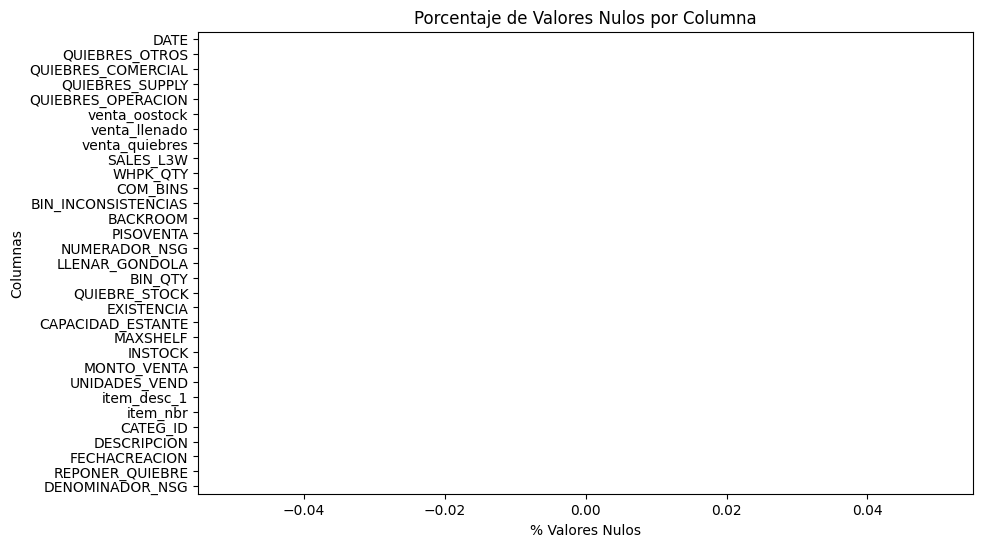

In [20]:
# Crear un DataFrame de ejemplo con valores nulos

# Calcular porcentajes de valores nulos por columna
porcentajes_nulos = df.isnull().mean() * 100
porcentajes_nulos = porcentajes_nulos.sort_values(ascending = True)
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentajes_nulos, y=porcentajes_nulos.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('% Valores Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Valores Nulos por Columna')

# Mostrar el gráfico
plt.show()

In [21]:
df.head()

,DATE,FECHACREACION,DESCRIPCION,CATEG_ID,item_nbr,item_desc_1,UNIDADES_VEND,MONTO_VENTA,INSTOCK,MAXSHELF,...,SALES_L3W,venta_quiebres,venta_llenado,venta_oostock,QUIEBRES_OPERACION,QUIEBRES_SUPPLY,QUIEBRES_COMERCIAL,QUIEBRES_OTROS,NUMERADOR_NSG,DENOMINADOR_NSG
17,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,240159,QUESO RALLADO 80G,43,47122,1.0,8.0,...,668087.0,0.0,0,0,0,0,1,0,1,1.0
22,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254100,QUESO GOUDA LAMINADO,58,173622,1.0,81.0,...,3481916.0,0.0,0,0,1,0,0,0,1,1.0
31,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254112,QUESO GOUDA LAMINADO,5,8723,1.0,72.0,...,191424.0,0.0,0,0,0,0,0,0,0,1.0
60,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254124,QUESO GOUDA LAMINADO,9,8890,1.0,112.0,...,143659.0,0.0,0,0,0,0,0,0,0,1.0
49,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,263719,QUESO RALLADO,74,41780,1.0,1440.0,...,584836.0,0.0,0,0,0,0,0,0,0,1.0


In [22]:
df.shape

(90166, 31)

In [23]:
# Podemos reindexar nuestro dataframe 
#df = df.sort_values(by = "DATE")
#df.index = pd.PeriodIndex(df.DATE, freq='D')
#df.head()

In [24]:
#df = df.dropna()

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_77059/2362317380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])


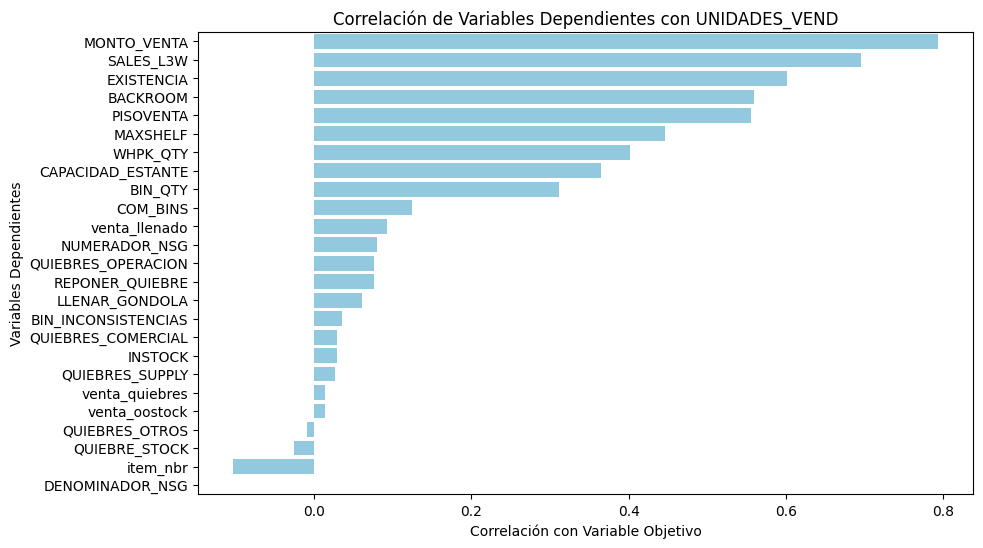

In [25]:
# Calcular la correlación de las variables dependientes con respecto a la variable objetivo
correlaciones = df.drop('UNIDADES_VEND', axis=1).corrwith(df['UNIDADES_VEND'])

# Ordenar las correlaciones de mayor a menor
correlaciones = correlaciones.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones, y=correlaciones.index, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Correlación con Variable Objetivo')
plt.ylabel('Variables Dependientes')
plt.title('Correlación de Variables Dependientes con UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [26]:
df_bkp=df

In [27]:
df

,DATE,FECHACREACION,DESCRIPCION,CATEG_ID,item_nbr,item_desc_1,UNIDADES_VEND,MONTO_VENTA,INSTOCK,MAXSHELF,...,SALES_L3W,venta_quiebres,venta_llenado,venta_oostock,QUIEBRES_OPERACION,QUIEBRES_SUPPLY,QUIEBRES_COMERCIAL,QUIEBRES_OTROS,NUMERADOR_NSG,DENOMINADOR_NSG
17,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,240159,QUESO RALLADO 80G,43,47122,1.0,8.0,...,668087.0,0.0,0,0,0,0,1,0,1,1.0
22,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254100,QUESO GOUDA LAMINADO,58,173622,1.0,81.0,...,3481916.0,0.0,0,0,1,0,0,0,1,1.0
31,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254112,QUESO GOUDA LAMINADO,5,8723,1.0,72.0,...,191424.0,0.0,0,0,0,0,0,0,0,1.0
60,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254124,QUESO GOUDA LAMINADO,9,8890,1.0,112.0,...,143659.0,0.0,0,0,0,0,0,0,0,1.0
49,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,263719,QUESO RALLADO,74,41780,1.0,1440.0,...,584836.0,0.0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90084,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5028517,TABLA QUESO PARRILLE,1,5958,1.0,48.0,...,165748.0,0.0,0,0,0,0,0,0,0,1.0
90090,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5029865,QUESO MANTEC OREGANO,2,7378,1.0,12.0,...,101628.0,0.0,0,0,0,0,0,0,0,1.0
90047,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5029866,QUESO MANTEC MERKEN,1,3689,1.0,12.0,...,33319.0,0.0,0,0,0,0,0,0,0,1.0
90093,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5035128,QUESO GAUDA TROZO,5,9200,1.0,0.0,...,25760.0,0.0,0,0,0,0,0,0,0,1.0


In [28]:
df_heat =df

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_77059/2778871380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_heat.corr())


<Axes: >

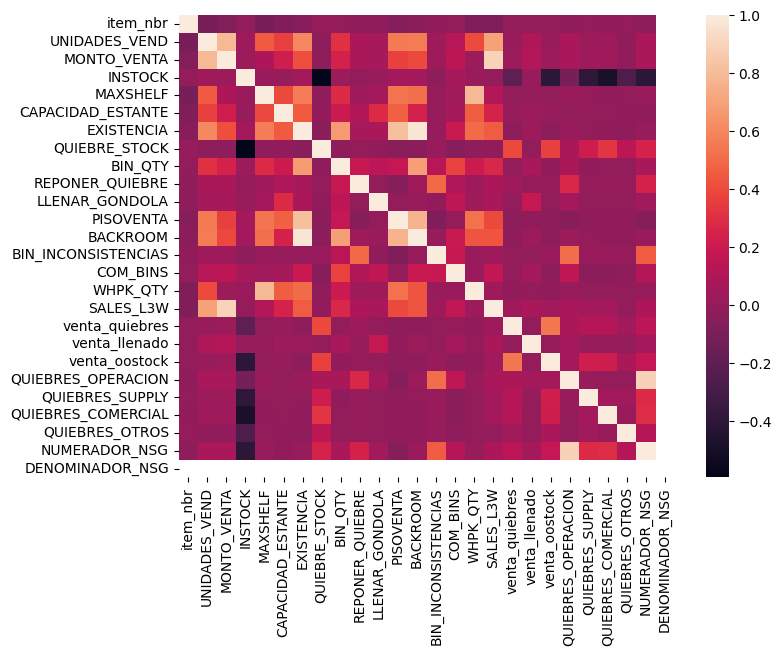

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df_heat.corr())

In [30]:
df_heat

,DATE,FECHACREACION,DESCRIPCION,CATEG_ID,item_nbr,item_desc_1,UNIDADES_VEND,MONTO_VENTA,INSTOCK,MAXSHELF,...,SALES_L3W,venta_quiebres,venta_llenado,venta_oostock,QUIEBRES_OPERACION,QUIEBRES_SUPPLY,QUIEBRES_COMERCIAL,QUIEBRES_OTROS,NUMERADOR_NSG,DENOMINADOR_NSG
17,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,240159,QUESO RALLADO 80G,43,47122,1.0,8.0,...,668087.0,0.0,0,0,0,0,1,0,1,1.0
22,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254100,QUESO GOUDA LAMINADO,58,173622,1.0,81.0,...,3481916.0,0.0,0,0,1,0,0,0,1,1.0
31,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254112,QUESO GOUDA LAMINADO,5,8723,1.0,72.0,...,191424.0,0.0,0,0,0,0,0,0,0,1.0
60,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,254124,QUESO GOUDA LAMINADO,9,8890,1.0,112.0,...,143659.0,0.0,0,0,0,0,0,0,0,1.0
49,2022-04-06,2022-04-05,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,263719,QUESO RALLADO,74,41780,1.0,1440.0,...,584836.0,0.0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90084,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5028517,TABLA QUESO PARRILLE,1,5958,1.0,48.0,...,165748.0,0.0,0,0,0,0,0,0,0,1.0
90090,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5029865,QUESO MANTEC OREGANO,2,7378,1.0,12.0,...,101628.0,0.0,0,0,0,0,0,0,0,1.0
90047,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5029866,QUESO MANTEC MERKEN,1,3689,1.0,12.0,...,33319.0,0.0,0,0,0,0,0,0,0,1.0
90093,2023-12-31,2023-12-30,QUESOS AUTOSERVICIO - QUESO MADURO,SC18979,5035128,QUESO GAUDA TROZO,5,9200,1.0,0.0,...,25760.0,0.0,0,0,0,0,0,0,0,1.0


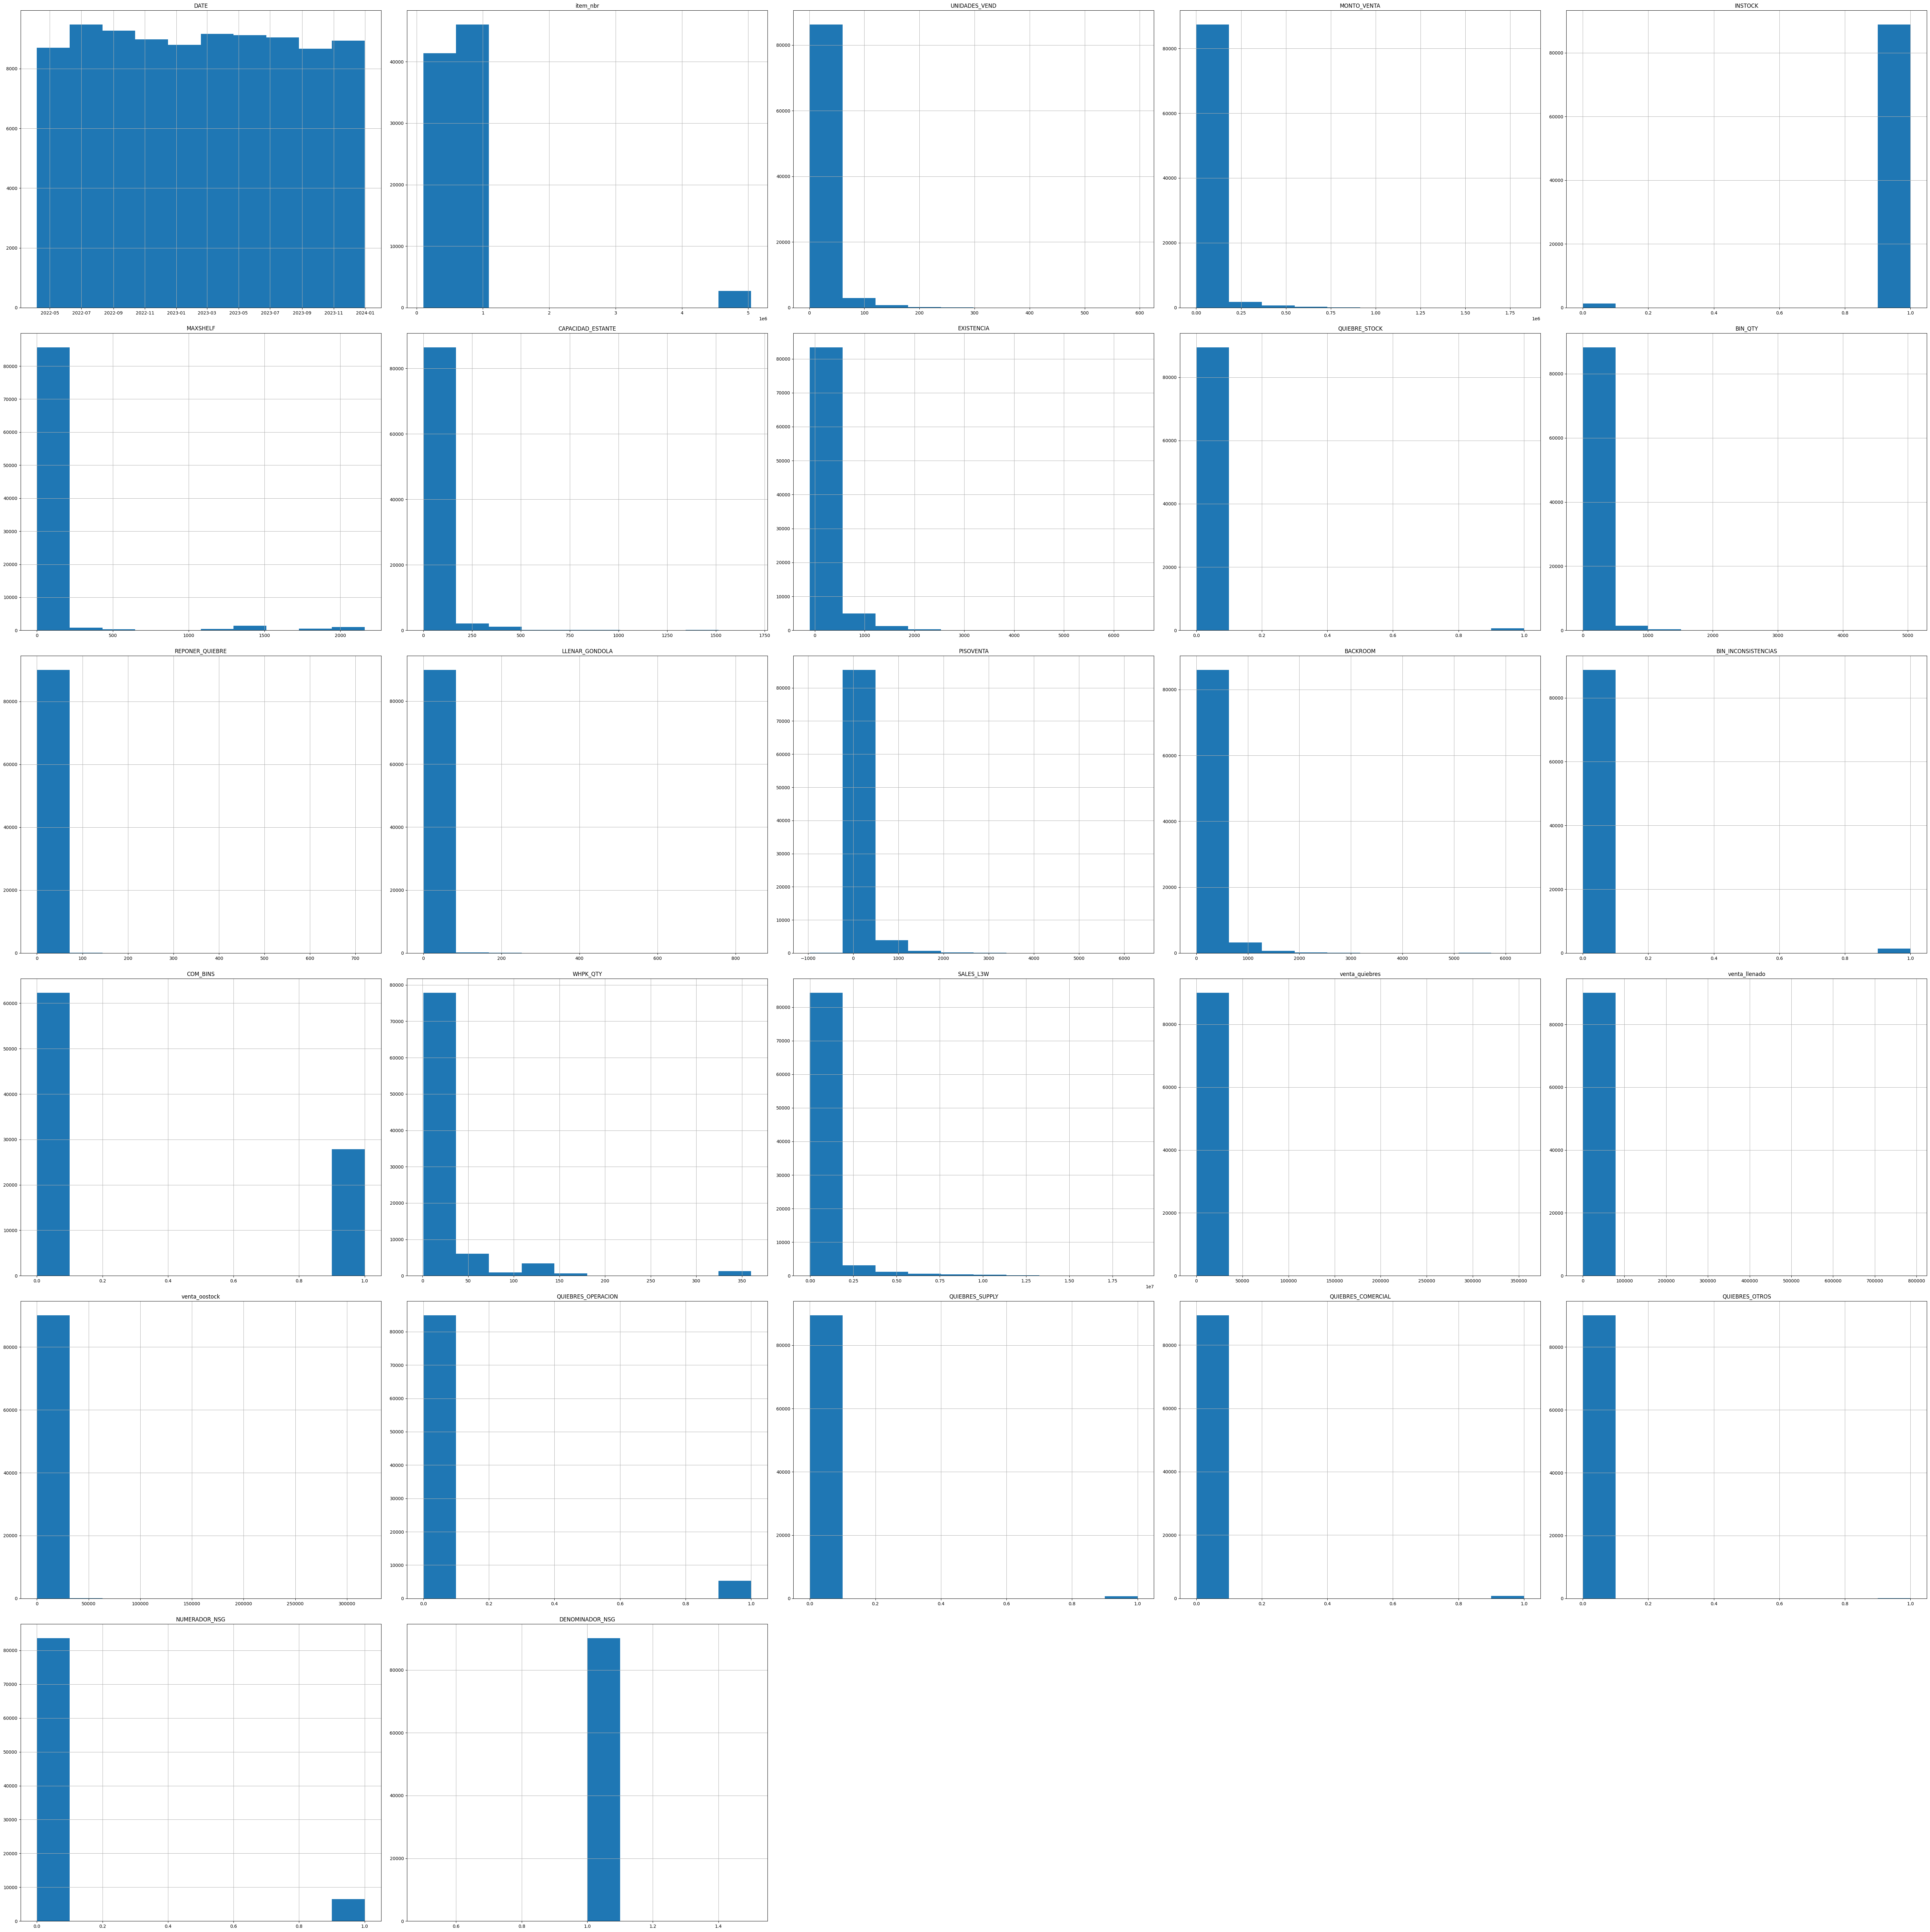

In [31]:
df_heat.hist(figsize=(60,60)) 
plt.tight_layout()
plt.show()

<Axes: xlabel='UNIDADES_VEND', ylabel='Density'>

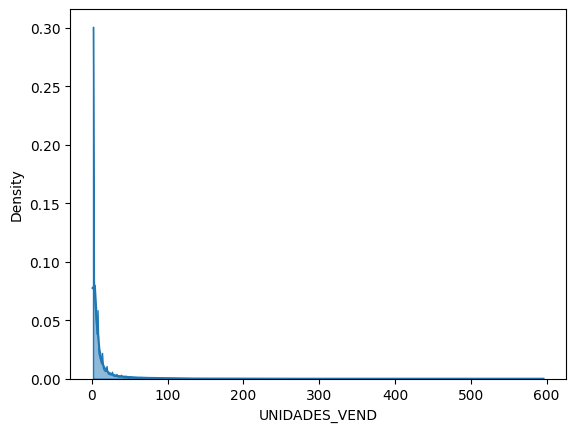

In [32]:
x = df_heat['UNIDADES_VEND']
sns.histplot(x = x,  kde=True, stat="density", bins=500, element = "poly" )

/var/folders/l_/_pmt0znn2bsg_f3mnw2xb1xh0000gn/T/ipykernel_77059/3384153857.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


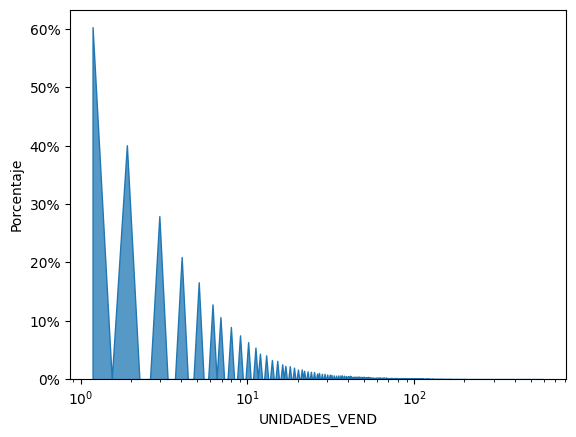

In [33]:
x = df_heat['UNIDADES_VEND']

# Crear el gráfico de distribución con seaborn
sns.histplot(x=x, stat="density", element="poly")

# Configurar el eje x en escala logarítmica
plt.xscale('log')

# Cambiar el eje y a porcentaje
plt.ylabel('Porcentaje')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

# Mostrar el gráfico
plt.show()

In [34]:
df['UNIDADES_VEND'].describe()

count    90166.000000
mean        11.925759
std         24.104604
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        596.000000
Name: UNIDADES_VEND, dtype: float64

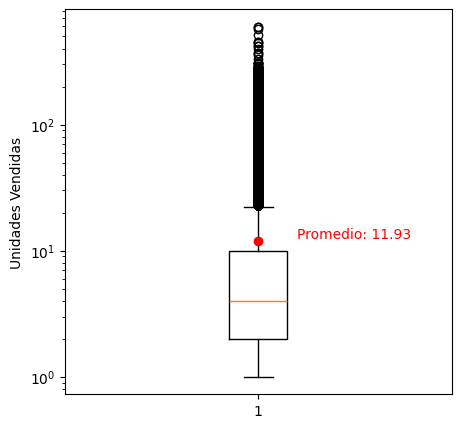

In [35]:
import numpy as np
import matplotlib.pyplot as plt


# Crear el boxplot
plt.figure(figsize=(5,5))
plt.boxplot(df['UNIDADES_VEND'])

# Configurar la escala del eje y en logarítmica
plt.yscale('log')

# Etiquetar el eje y como "Unidades Vendidas"
plt.ylabel('Unidades Vendidas')

# Calcular el promedio y agregar su valor numérico y marcador en el boxplot
promedio = df['UNIDADES_VEND'].mean()
plt.text(1.1, promedio, f'Promedio: {promedio:.2f}', color='red', fontsize=10, verticalalignment='bottom')
plt.plot(1, promedio, 'ro')  # Añadir marcador en el boxplot

# Mostrar el boxplot
plt.show()

In [36]:
df = df_bkp

In [37]:
agg_item_df = df.groupby(['DATE', 'item_nbr', 'item_desc_1']).agg({'UNIDADES_VEND':'sum'}).reset_index().sort_values(['UNIDADES_VEND'], ascending = False)

In [38]:
agg_item_df.head()

,DATE,item_nbr,item_desc_1,UNIDADES_VEND
56670,2023-05-08,276563,QUESO PARMESANO RALL,596
31920,2022-11-14,581716,Q. MANT R BUENO L500,591
74496,2023-09-09,276563,QUESO PARMESANO RALL,577
31477,2022-11-11,581716,Q. MANT R BUENO L500,509
74654,2023-09-10,276563,QUESO PARMESANO RALL,451


In [39]:
agg_item_df_581716 =  agg_item_df[agg_item_df.item_nbr.isin([581716])]
agg_item_df_581716.head(10)

,DATE,item_nbr,item_desc_1,UNIDADES_VEND
31920,2022-11-14,581716,Q. MANT R BUENO L500,591
31477,2022-11-11,581716,Q. MANT R BUENO L500,509
31630,2022-11-12,581716,Q. MANT R BUENO L500,420
31332,2022-11-10,581716,Q. MANT R BUENO L500,369
59722,2023-05-29,581716,Q. MANT R BUENO L500,300
32917,2022-11-21,581716,Q. MANT R BUENO L500,293
59876,2023-05-30,581716,Q. MANT R BUENO L500,280
28912,2022-10-24,581716,Q. MANT R BUENO L500,276
30925,2022-11-07,581716,Q. MANT R BUENO L500,266
31776,2022-11-13,581716,Q. MANT R BUENO L500,259


In [40]:
agg_item_df_581716 = agg_item_df_581716.sort_values(['DATE']).reset_index(drop=True)


In [41]:
df_media = agg_item_df_581716

In [42]:

# Extraer el mes y el año de la columna de fecha
df_media['MES'] = df_media['DATE'].dt.month
df_media['AÑO'] = df_media['DATE'].dt.year

# Agrupar por producto, año y mes, y calcular la suma de la cantidad vendida
ventas_por_mes = df_media.groupby(['AÑO'])['UNIDADES_VEND'].mean().reset_index()



ventas_por_mes

,AÑO,UNIDADES_VEND
0,2022,139.570342
1,2023,70.101695


In [43]:
agg_item_df_581716['UNIDADES_VEND'].describe()

count    617.000000
mean      99.713128
std       64.195853
min        1.000000
25%       53.000000
50%       88.000000
75%      135.000000
max      591.000000
Name: UNIDADES_VEND, dtype: float64

In [44]:
df_581716 = agg_item_df_581716
df_581716.head(10)

,DATE,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO
0,2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022
1,2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022
2,2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022
3,2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022
4,2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022
5,2022-04-11,581716,Q. MANT R BUENO L500,167,4,2022
6,2022-04-12,581716,Q. MANT R BUENO L500,147,4,2022
7,2022-04-13,581716,Q. MANT R BUENO L500,128,4,2022
8,2022-04-14,581716,Q. MANT R BUENO L500,137,4,2022
9,2022-04-15,581716,Q. MANT R BUENO L500,54,4,2022


In [45]:
df_581716.UNIDADES_VEND.describe()

count    617.000000
mean      99.713128
std       64.195853
min        1.000000
25%       53.000000
50%       88.000000
75%      135.000000
max      591.000000
Name: UNIDADES_VEND, dtype: float64

In [46]:
df_581716.dtypes

DATE             datetime64[ns]
item_nbr                  int64
item_desc_1              object
UNIDADES_VEND             int64
MES                       int64
AÑO                       int64
dtype: object

In [47]:
#adding holiday data

holiday = pd.DataFrame([])


for date_, name in sorted(holidays.CL(years=[2021, 2022, 2023, 2024]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "CL-Holidays", 'lower_window': -2, 'upper_window':0}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday

,ds,holiday,lower_window,upper_window
0,2021-01-01,CL-Holidays,-2,0
1,2021-04-02,CL-Holidays,-2,0
2,2021-04-03,CL-Holidays,-2,0
3,2021-05-01,CL-Holidays,-2,0
4,2021-05-21,CL-Holidays,-2,0
...,...,...,...,...
63,2024-10-12,CL-Holidays,-2,0
64,2024-10-31,CL-Holidays,-2,0
65,2024-11-01,CL-Holidays,-2,0
66,2024-12-08,CL-Holidays,-2,0


In [48]:
#setting variables
feature = 'UNIDADES_VEND'
prediction_days = 60

In [49]:
#Variables

forecast_start_dt = date(2023,12,1) #data set ends of (2023,8,31)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2023-12-01


In [50]:
#PROPHET MODEL

df_copy = df_581716.copy()
df_copy = df_copy.rename(columns={'DATE': 'ds', feature: 'y'})
df_copy = df_copy.drop(['item_nbr', 'item_desc_1'], axis=1)
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet(holidays=holiday, changepoint_prior_scale = 0.1, seasonality_prior_scale= 0.1, weekly_seasonality= True).fit(train_set)

future = m.make_future_dataframe(periods=31)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

19:37:42 - cmdstanpy - INFO - Chain [1] start processing
19:37:42 - cmdstanpy - INFO - Chain [1] done processing


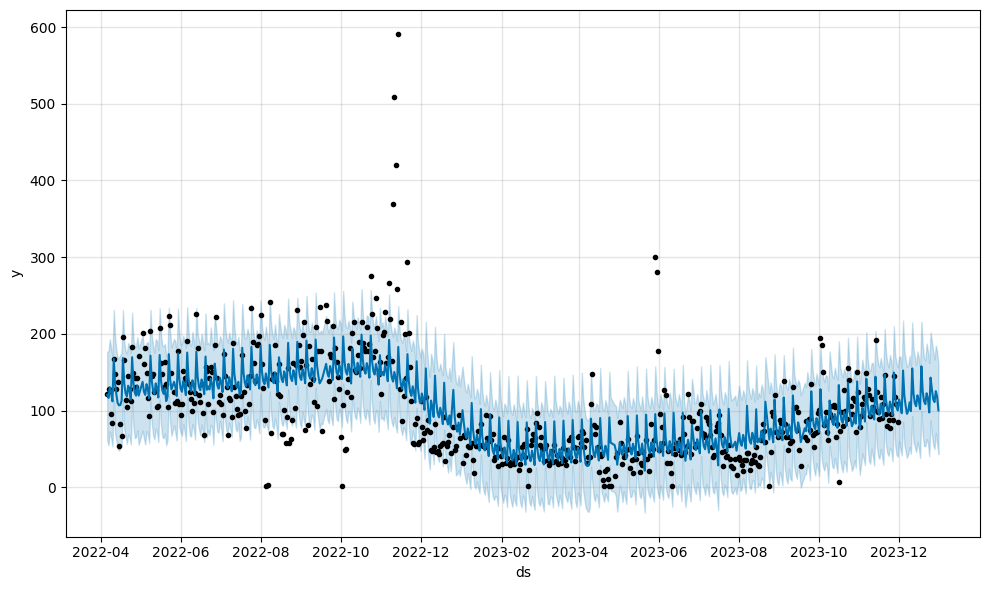

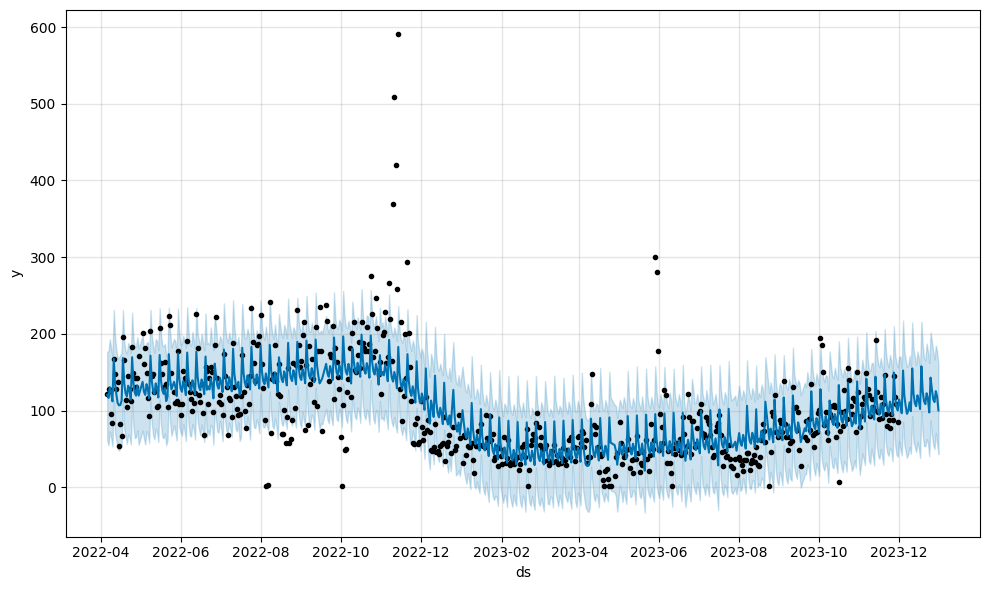

In [51]:
m.plot(fcst_prophet_train)

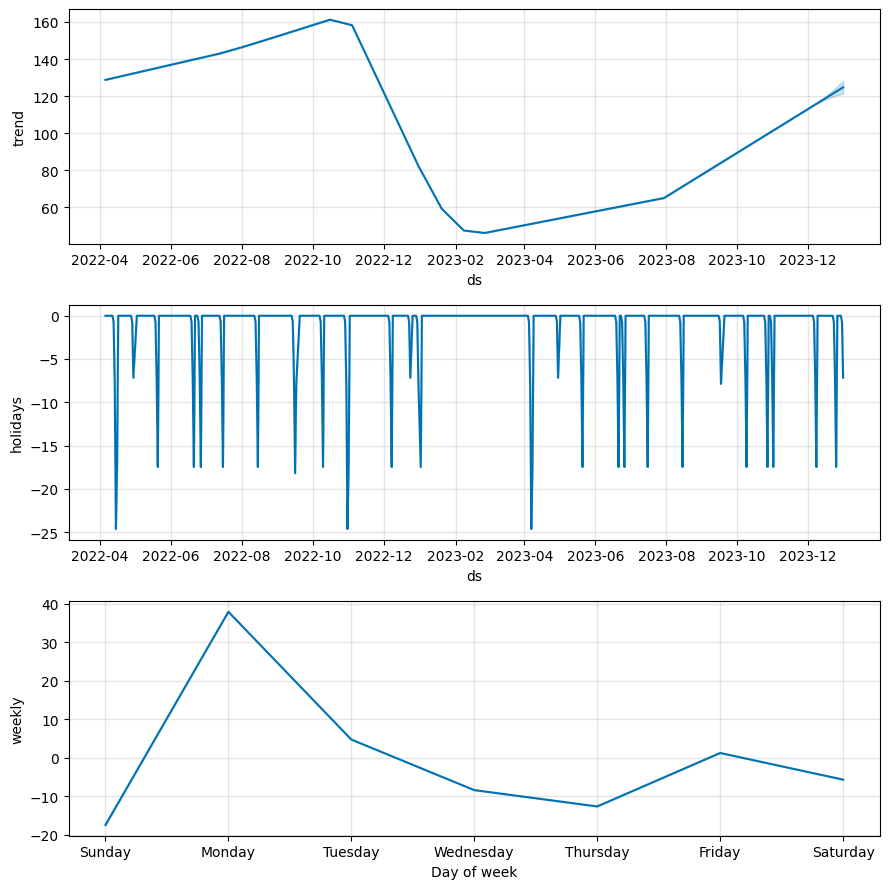

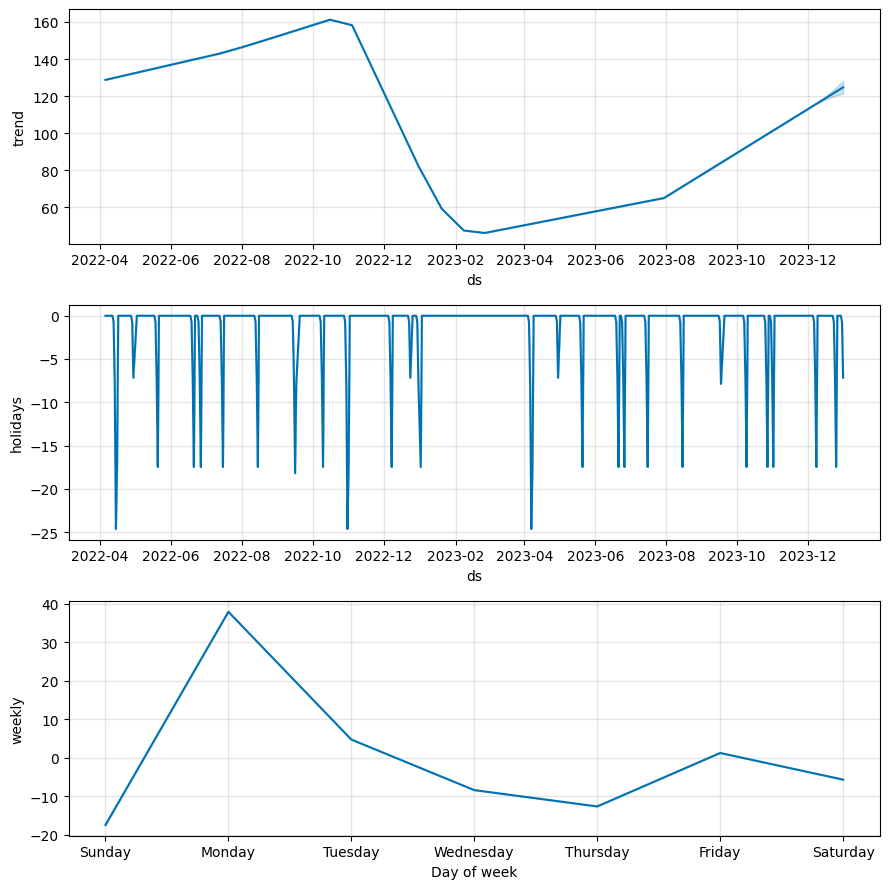

In [52]:
m.plot_components(fcst_prophet_train)



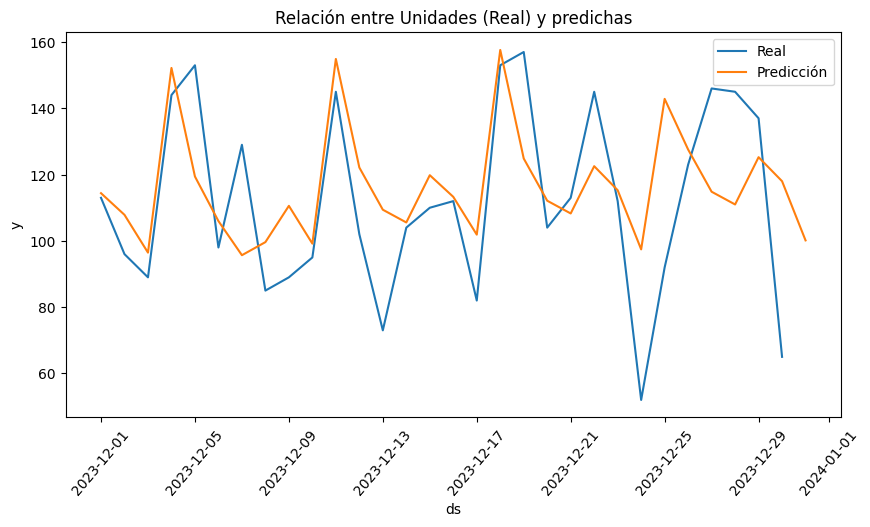

In [53]:
x = predicted_df.ds
y1 = df_copy['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Predicción')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades (Real) y predichas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [54]:
predicted_df = predicted_df.merge(df_copy)

In [55]:
predicted_df.dtypes

ds      datetime64[ns]
yhat           float64
y                int64
MES              int64
AÑO              int64
dtype: object

In [56]:
df_copy.dtypes

ds     datetime64[ns]
y               int64
MES             int64
AÑO             int64
dtype: object

In [57]:
predicted_df

,ds,yhat,y,MES,AÑO
0,2023-12-01,114.396437,113,12,2023
1,2023-12-02,107.860298,96,12,2023
2,2023-12-03,96.457889,89,12,2023
3,2023-12-04,152.194346,144,12,2023
4,2023-12-05,119.426229,153,12,2023
5,2023-12-06,105.977673,98,12,2023
6,2023-12-07,95.678760,129,12,2023
7,2023-12-08,99.628649,85,12,2023
8,2023-12-09,110.575176,89,12,2023
9,2023-12-10,99.172767,95,12,2023


In [58]:
mape(predicted_df['y'], predicted_df['yhat'])


17.79455208253854

In [59]:
RMSE(predicted_df['y'], predicted_df['yhat'])

21.490359125306874

In [60]:
from sklearn.metrics import r2_score
r2_score(predicted_df['y'], predicted_df['yhat'])

0.4043573039487285

In [61]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='500 days', period='30 days', horizon = '30 days')

19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
df_p = performance_metrics(df_cv)
df_p[['horizon','rmse']]

,horizon,rmse
0,3 days,61.610109
1,4 days,52.383016
2,5 days,38.938358
3,6 days,25.070628
4,7 days,21.907018
5,8 days,20.254628
6,9 days,20.737445
7,10 days,27.292129
8,11 days,33.766934
9,12 days,39.380151


In [63]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
27,2023-10-01,39.190760,-23.191766,104.761886,101,2023-09-01,61.197267,False
29,2023-10-03,72.780026,4.997981,133.151236,185,2023-10-01,60.659446,False
30,2023-10-04,60.465984,-6.220145,123.289616,150,2023-10-01,59.689344,False
11,2023-09-13,47.632146,-19.907223,113.777826,105,2023-09-01,54.636052,False
17,2023-09-21,45.110828,-23.136675,108.941570,86,2023-09-01,47.545549,False
20,2023-09-24,39.064564,-28.948029,108.220029,74,2023-09-01,47.210049,False
26,2023-09-30,51.289213,-18.054989,114.072037,97,2023-09-01,47.124523,False
50,2023-10-24,74.845331,12.170027,143.525036,140,2023-10-01,46.539049,False
1,2023-09-03,38.685975,-21.837974,102.618625,72,2023-09-01,46.269479,False
38,2023-10-12,58.499421,-4.838115,119.165868,107,2023-10-01,45.327644,False


In [64]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'weekly_seasonality':[2, 5, 10],
    'yearly_seasonality':[2, 5, 10]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='570 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing
19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:47 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1]

19:38:33 - cmdstanpy - INFO - Chain [1] done processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:39 - cmdstanpy - INFO - Chain [1] 

19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1]

19:40:02 - cmdstanpy - INFO - Chain [1] done processing
19:40:03 - cmdstanpy - INFO - Chain [1] start processing
19:40:03 - cmdstanpy - INFO - Chain [1] done processing
19:40:03 - cmdstanpy - INFO - Chain [1] start processing
19:40:03 - cmdstanpy - INFO - Chain [1] done processing
19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
19:40:05 - cmdstanpy - INFO - Chain [1] start processing
19:40:05 - cmdstanpy - INFO - Chain [1] done processing
19:40:06 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1] done processing
19:40:06 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1] done processing
19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:07 - cmdstanpy - INFO - Chain [1] done processing
19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:07 - cmdstanpy - INFO - Chain [1] done processing
19:40:08 - cmdstanpy - INFO - Chain [1] 

In [65]:
tuning_results.sort_values('rmse') 

,changepoint_prior_scale,seasonality_prior_scale,weekly_seasonality,yearly_seasonality,rmse
115,0.500,0.01,10,5,14.732767
112,0.500,0.01,5,5,15.155494
3,0.001,0.01,5,2,15.686582
21,0.001,1.00,5,2,16.006852
114,0.500,0.01,10,2,17.221847
...,...,...,...,...,...
14,0.001,0.10,5,10,53.754003
124,0.500,0.10,10,5,53.935235
11,0.001,0.10,2,10,55.179984
32,0.001,10.00,5,10,57.363502


In [66]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale     0.500000
seasonality_prior_scale     0.010000
weekly_seasonality         10.000000
yearly_seasonality          5.000000
rmse                       14.732767
Name: 0, dtype: float64

In [67]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])


{'changepoint_prior_scale': 0.5,
 'seasonality_prior_scale': 0.01,
 'weekly_seasonality': 10.0,
 'yearly_seasonality': 5.0,
 'rmse': 14.732766552404595}

In [68]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = 0.5, 
            seasonality_prior_scale = 0.01,
            weekly_seasonality= 10,
            yearly_seasonality= 2,
           holidays =holiday)

In [69]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]



19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing


In [70]:

predicted_df = predicted_df.merge(df_copy)

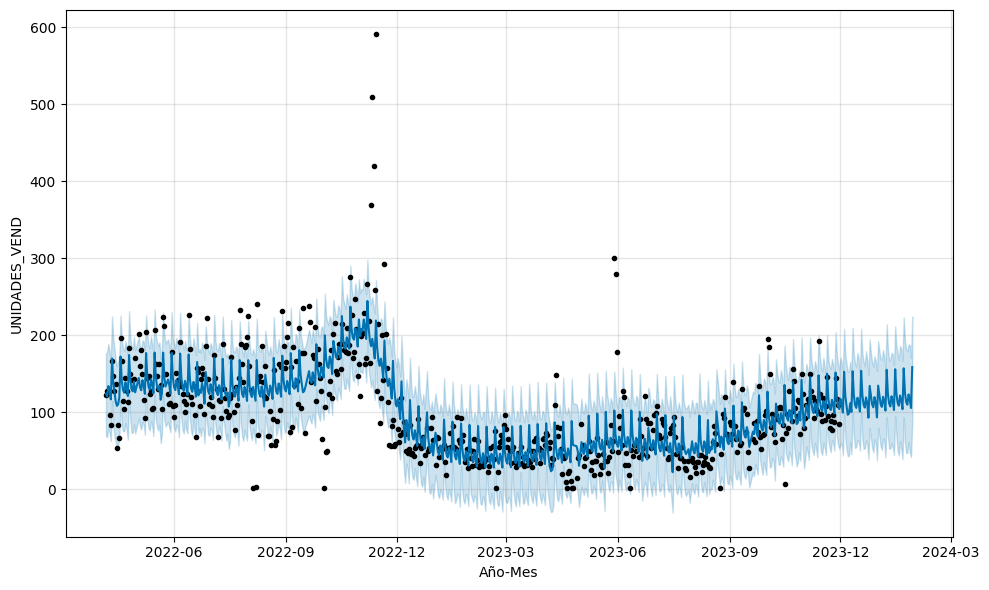

In [71]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()


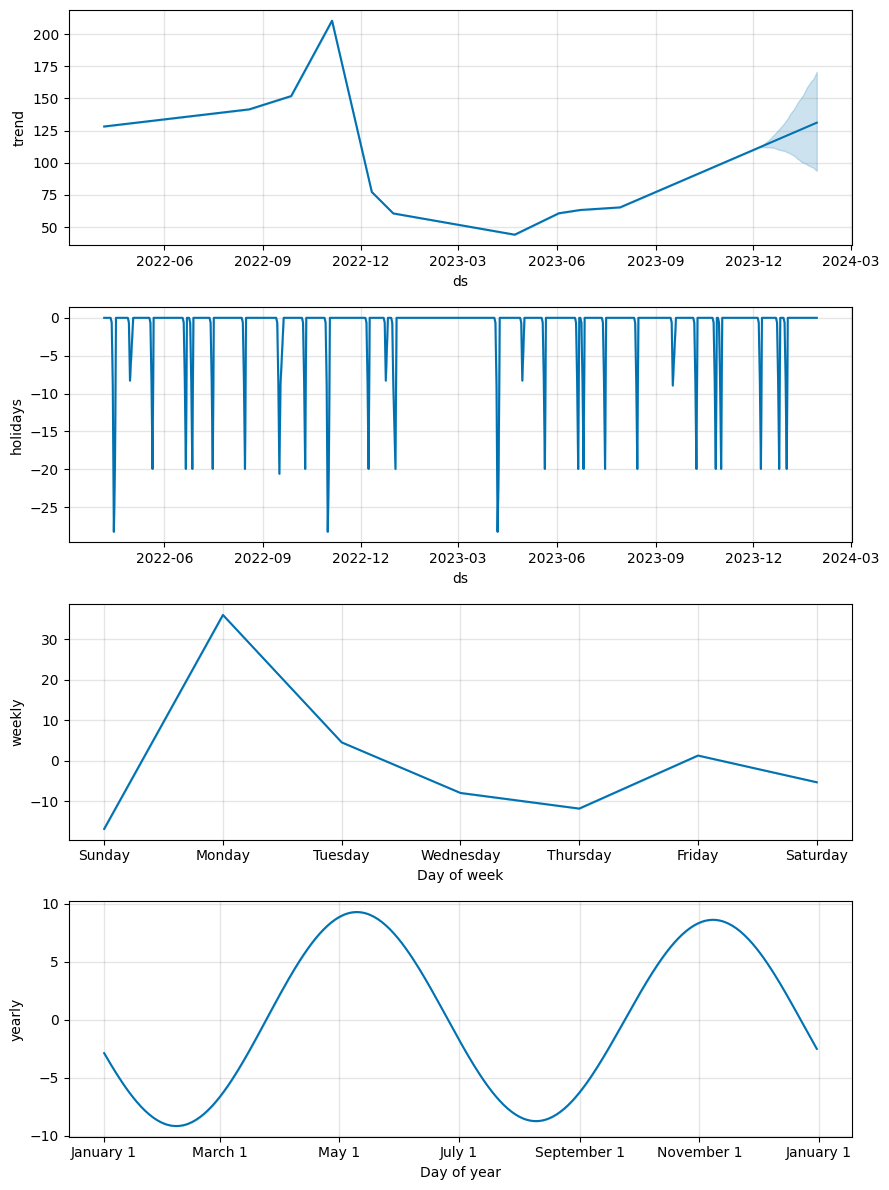

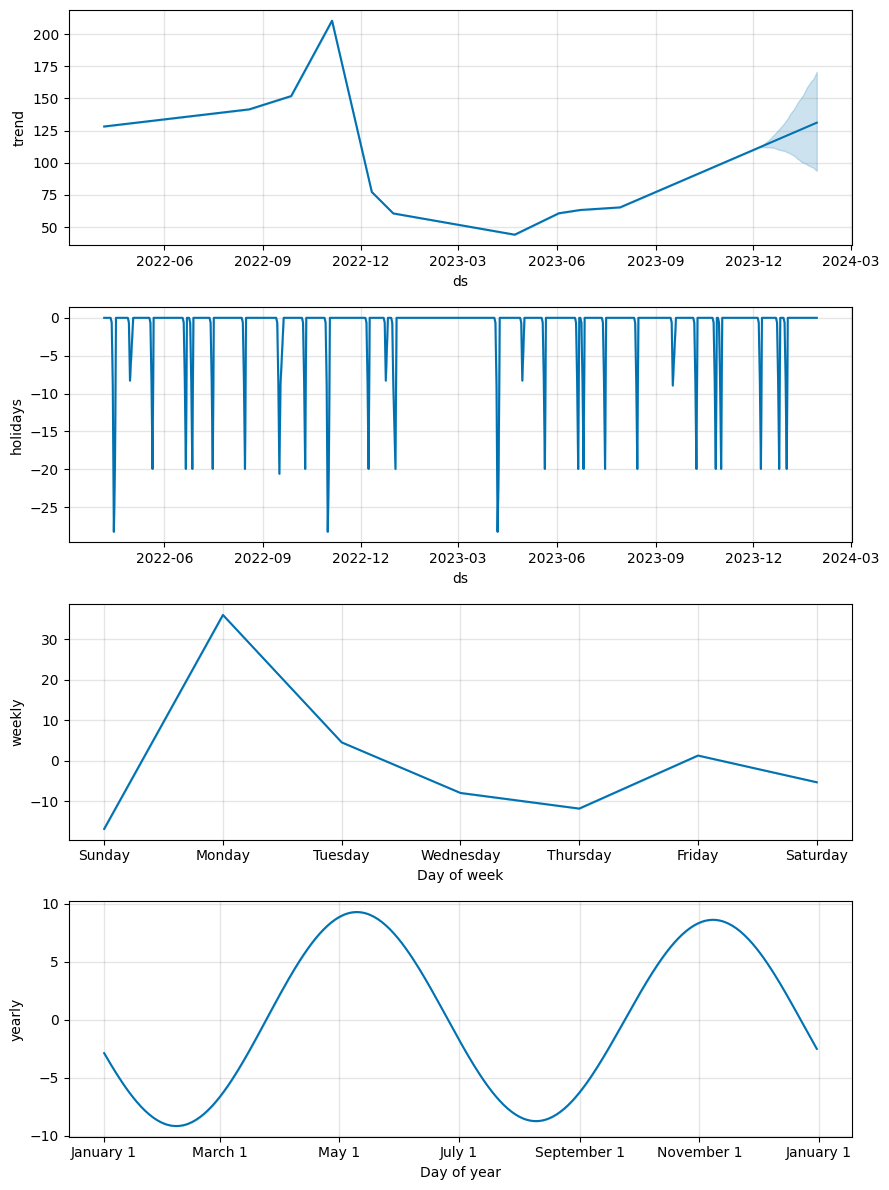

In [72]:
m.plot_components(fcst_prophet_train)


In [73]:
RMSE(predicted_df['y'], predicted_df['yhat'])

21.495789159517713

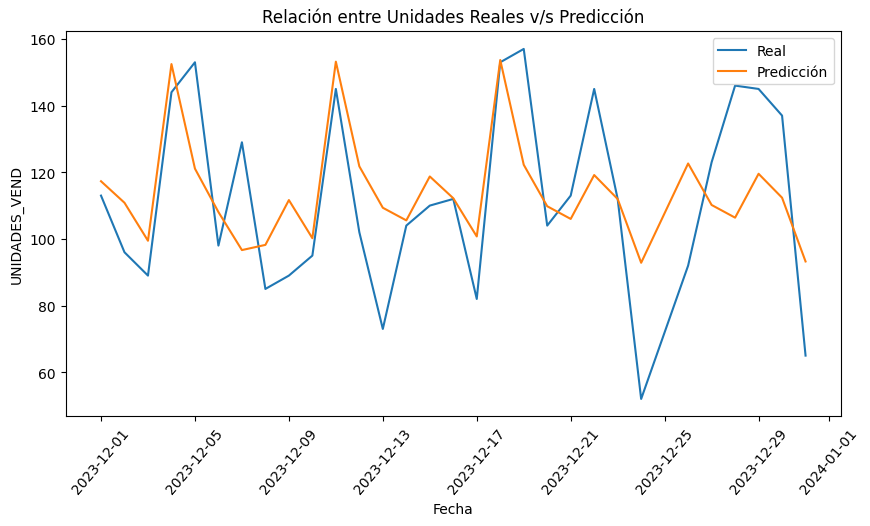

In [74]:
x = predicted_df.ds
y1 = predicted_df['y']
fig, ax = plt.subplots(figsize=(10, 5))
y2 = predicted_df['yhat']
sns.lineplot(x = x, y = y1, data = predicted_df , label='Real')
sns.lineplot(x = x, y = y2, data = predicted_df, label='Predicción')
plt.xticks(rotation=50)


# Añadir título
plt.title('Relación entre Unidades Reales v/s Predicción')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)
plt.xlabel('Fecha')
plt.ylabel('UNIDADES_VEND')
# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [75]:
df = agg_item_df_581716

In [76]:
df.shape

(617, 6)

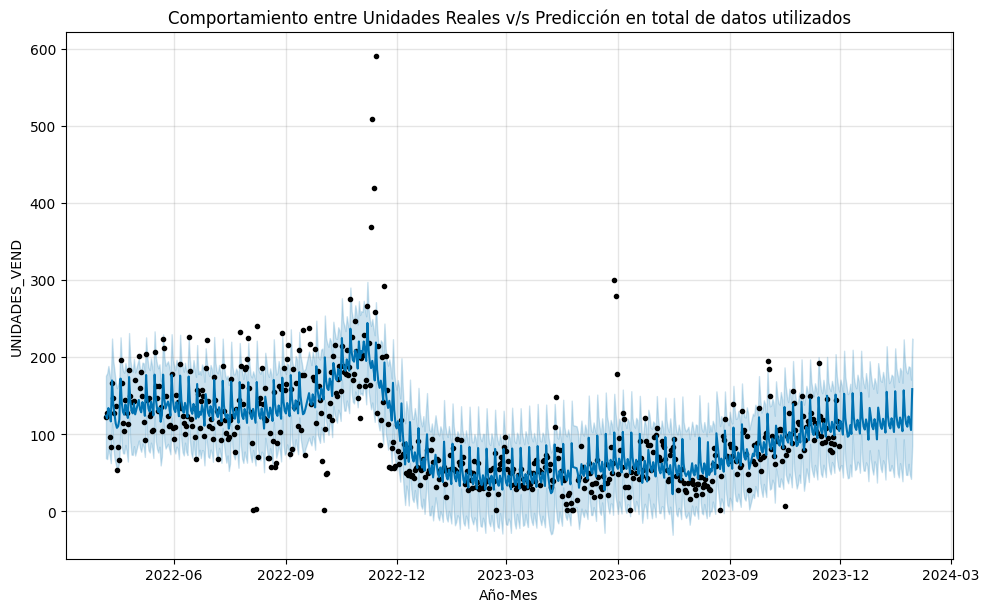

In [77]:
m.plot(fcst_prophet_train)

# Etiquetas personalizadas para los ejes
plt.title('Comportamiento entre Unidades Reales v/s Predicción en total de datos utilizados')
plt.xlabel('Año-Mes')
plt.ylabel('UNIDADES_VEND')

# Mostrar el gráfico
plt.show()

In [147]:

df.head(10)

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift,UNIDADES_VEND3d,UNIDADES_Diff,predictions_ARIMA_diff,UNIDADES_ARIMA
DATE,,,,,,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029,0.0,122.000000,122.0,-0.004265,121.995735
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0,125.000000,6.0,-45.455291,76.544709
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0,125.000000,-3.0,-29.527910,92.472090
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0,116.333333,-29.0,-15.636021,106.363979
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0,101.666667,-12.0,10.334803,132.334803
2022-04-11,581716,Q. MANT R BUENO L500,167,4,2022,99.713128,5,138.193721,84.0,115.666667,83.0,-2.437436,119.562564
2022-04-12,581716,Q. MANT R BUENO L500,147,4,2022,99.713128,6,138.070260,167.0,132.666667,-20.0,-73.420954,48.579046
2022-04-13,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,7,137.946798,147.0,147.333333,-19.0,-6.944079,115.055921
2022-04-14,581716,Q. MANT R BUENO L500,137,4,2022,99.713128,8,137.823337,128.0,137.333333,9.0,6.278312,128.278312


In [148]:
df.shape

(617, 13)

## 2) Modelos básicos para prónosticos
* Modelo de la media constante
* Modelo de tendencia lineal
* Modelo Random Walk


La serie que vamos a intentar predecir con los siguientes modelos es la cantidad de productos a vender para la tienda 88. 

## 2.a) Media constante

In [79]:
# Calculamos el promedio, uniforme para todos
model_mean_pred = df.UNIDADES_VEND.mean()

# Transformamos ese valor, inicialmente calculado en logaritmo
# Lo asignamos a una columna
df["UNIDADES_PROM"] = model_mean_pred

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

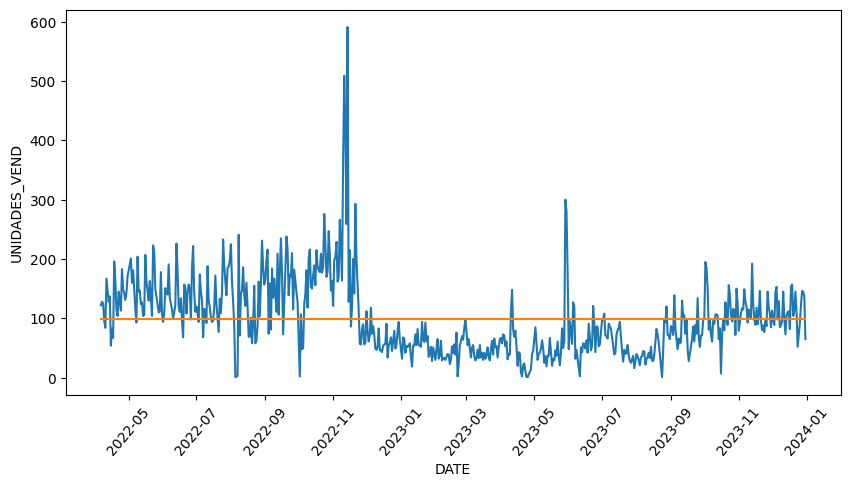

In [80]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_PROM']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

* ¿Cuán bien ajusta esta estimación?

Calculemos el Error Cuadrático Medio y su raíz...

In [81]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [82]:
model_mean_RMSE = RMSE(df.UNIDADES_PROM, df.UNIDADES_VEND)
model_mean_RMSE

64.14380904907318

In [83]:
# Guardamos todo en un dataframe
dfResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfResults.loc[0,"Model"] = "Mean"
dfResults.loc[0,"Forecast"] = model_mean_pred
dfResults.loc[0,"RMSE"] = model_mean_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Mean,99.713128,64.143809


In [84]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df["timeIndex"] = df.DATE - df.DATE.min()
df.head()

,DATE,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex
0,2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0 days
1,2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1 days
2,2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2 days
3,2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3 days
4,2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4 days


In [85]:
# Transformamos la última columna a días con timedelta
df["timeIndex"] =  df["timeIndex"]/np.timedelta64(1, 'D')


In [86]:
# Redondeamos, quitando todos los decimales
df["timeIndex"] = df["timeIndex"].round(0).astype(int)
df.timeIndex.tail()

612    630
613    631
614    632
615    633
616    634
Name: timeIndex, dtype: int64

In [87]:
df.head()

,DATE,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex
0,2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0
1,2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1
2,2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2
3,2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3
4,2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4


In [88]:
# creamos un dataset agrupado por fecha
groupby_date = df.groupby(df.DATE)["UNIDADES_VEND"].sum()
groupby_date = pd.DataFrame(groupby_date)
groupby_date.head(10)

,UNIDADES_VEND
DATE,
2022-04-06,122
2022-04-07,128
2022-04-08,125
2022-04-09,96
2022-04-10,84
2022-04-11,167
2022-04-12,147
2022-04-13,128
2022-04-14,137


In [89]:
groupby_date["DATE"] =groupby_date.index

In [90]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
groupby_date["timeIndex"] = groupby_date.DATE - groupby_date.DATE.min()

# Transformamos la última columna a días con timedelta
groupby_date["timeIndex"] =  groupby_date["timeIndex"]/np.timedelta64(1, 'D')

In [91]:
groupby_date.head()

,UNIDADES_VEND,DATE,timeIndex
DATE,,,
2022-04-06,122,2022-04-06,0.0
2022-04-07,128,2022-04-07,1.0
2022-04-08,125,2022-04-08,2.0
2022-04-09,96,2022-04-09,3.0
2022-04-10,84,2022-04-10,4.0


In [92]:
# Redondeamos, quitando todos los decimales
groupby_date["timeIndex"] = groupby_date["timeIndex"].round(0).astype(int)
groupby_date.timeIndex.tail()

DATE
2023-12-27    630
2023-12-28    631
2023-12-29    632
2023-12-30    633
2023-12-31    634
Name: timeIndex, dtype: int64

In [93]:
# Ahora fiteamos nuestro modelo de regresión lineal entre priceMod y timeIndex
model_linear = smf.ols('UNIDADES_VEND ~ timeIndex', data = df).fit()

In [94]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          UNIDADES_VEND   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     87.20
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.77e-19
Time:                        19:40:52   Log-Likelihood:                -3402.0
No. Observations:                 617   AIC:                             6808.
Df Residuals:                     615   BIC:                             6817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.8110      4.836     28.702      0.000     129.313     148.309
timeIndex     -0.1235      0.013     -9.338      0.000      -0.149      -0.097
==============================================================================
Omnibus:                      312.593   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3114.807
Skew:                           2.020   Prob(JB):                         0.00
Kurtosis:                      13.239   Cond. No.                         731.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model_linear_pred = model_linear.predict()


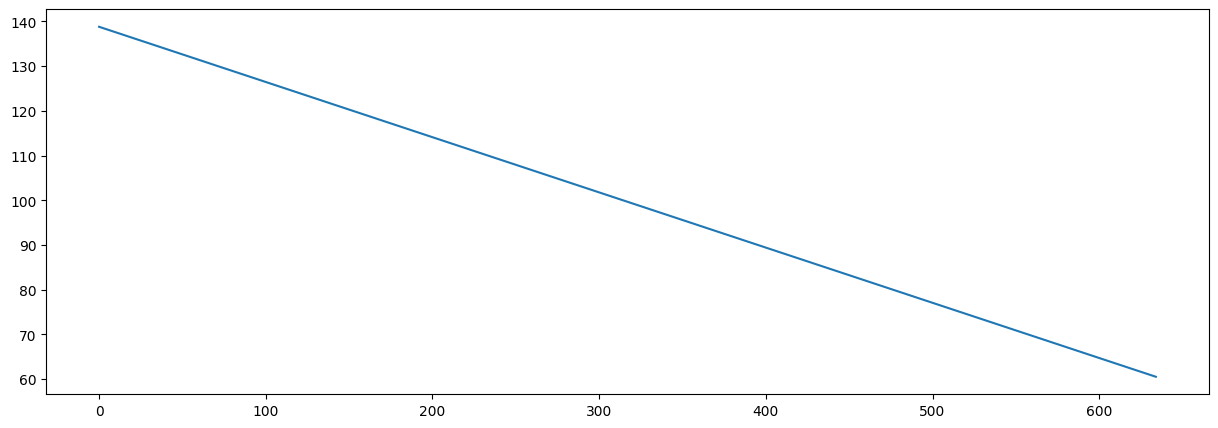

In [96]:
# Ploteamos los resultados de la predicción
plt.rcParams['figure.figsize'] = (15, 5)
#df.plot(kind="line", x="timeIndex", y = "UNIDADES_VEND")
plt.plot(df.timeIndex,model_linear_pred, '-');

In [97]:
df

,DATE,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex
0,2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0
1,2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1
2,2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2
3,2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3
4,2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4
...,...,...,...,...,...,...,...,...
612,2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630
613,2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631
614,2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632
615,2023-12-30,581716,Q. MANT R BUENO L500,137,12,2023,99.713128,633


In [98]:
df["UNIDADES_Linear"] = model_linear_pred
df.head()

,DATE,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear
0,2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029
1,2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568
2,2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106
3,2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645
4,2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183


(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

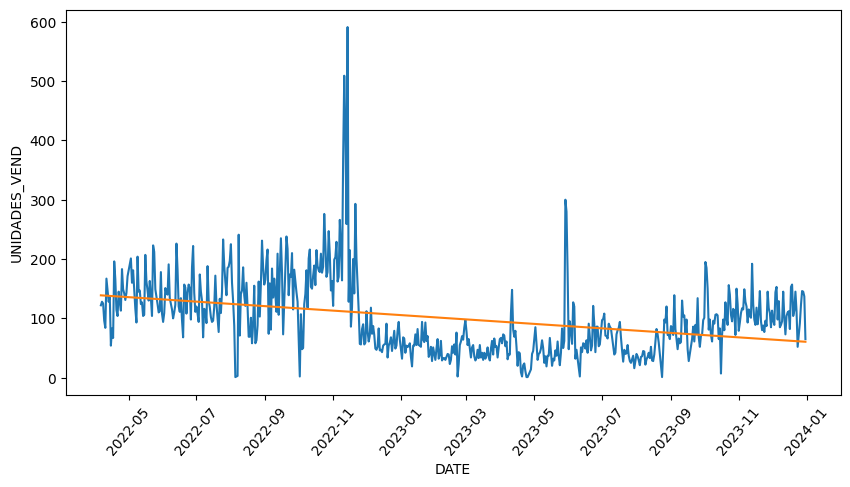

In [99]:
x = df['DATE']
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Linear']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [100]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(df.UNIDADES_Linear, df.UNIDADES_VEND)
model_linear_RMSE

60.02906370801312

In [101]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
dfResults.loc[1,"Model"] = "Linear"
dfResults.loc[1,"Forecast"] = model_linear_pred[-1]
dfResults.loc[1,"RMSE"] = model_linear_RMSE
dfResults.head()

,Model,Forecast,RMSE
0,Mean,99.713128,64.143809
1,Linear,60.536387,60.029064


In [102]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [103]:
df.set_index('DATE', inplace=True)


In [104]:
df

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear
DATE,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183
...,...,...,...,...,...,...,...,...
2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630,61.030234
2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631,60.906772
2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632,60.783311


In [105]:
# Ordenar por subcategoría y fecha
df.sort_values(['DATE'], inplace=True)

# Aplicar shift para obtener unidades vendidas del día posterior
df['UNIDADES_Shift'] = df['UNIDADES_VEND'].shift(1)

df.iloc[1:200]

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift
DATE,,,,,,,,,
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0
2022-04-11,581716,Q. MANT R BUENO L500,167,4,2022,99.713128,5,138.193721,84.0
...,...,...,...,...,...,...,...,...,...
2022-10-24,581716,Q. MANT R BUENO L500,276,10,2022,99.713128,201,113.995252,187.0
2022-10-25,581716,Q. MANT R BUENO L500,226,10,2022,99.713128,202,113.871790,276.0
2022-10-26,581716,Q. MANT R BUENO L500,170,10,2022,99.713128,203,113.748329,226.0


In [106]:
df['UNIDADES_Shift'] = df['UNIDADES_Shift'].fillna(0)

In [107]:
df

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift
DATE,,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029,0.0
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0
...,...,...,...,...,...,...,...,...,...
2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630,61.030234,92.0
2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631,60.906772,123.0
2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632,60.783311,146.0


In [108]:
# creamos un dataset agrupado por fecha
groupby_date2 = df.groupby(df.index)["UNIDADES_VEND"].sum()
groupby_date2 = pd.DataFrame(groupby_date)
groupby_date2.head(10)

,UNIDADES_VEND,DATE,timeIndex
DATE,,,
2022-04-06,122,2022-04-06,0
2022-04-07,128,2022-04-07,1
2022-04-08,125,2022-04-08,2
2022-04-09,96,2022-04-09,3
2022-04-10,84,2022-04-10,4
2022-04-11,167,2022-04-11,5
2022-04-12,147,2022-04-12,6
2022-04-13,128,2022-04-13,7
2022-04-14,137,2022-04-14,8


In [109]:
groupby_date2["UNIDADES_Shift"] = groupby_date2.UNIDADES_VEND.shift(periods = 1, fill_value=0)
groupby_date2.tail(10)

,UNIDADES_VEND,DATE,timeIndex,UNIDADES_Shift
DATE,,,,
2023-12-21,113,2023-12-21,624,104
2023-12-22,145,2023-12-22,625,113
2023-12-23,112,2023-12-23,626,145
2023-12-24,52,2023-12-24,627,112
2023-12-26,92,2023-12-26,629,52
2023-12-27,123,2023-12-27,630,92
2023-12-28,146,2023-12-28,631,123
2023-12-29,145,2023-12-29,632,146
2023-12-30,137,2023-12-30,633,145


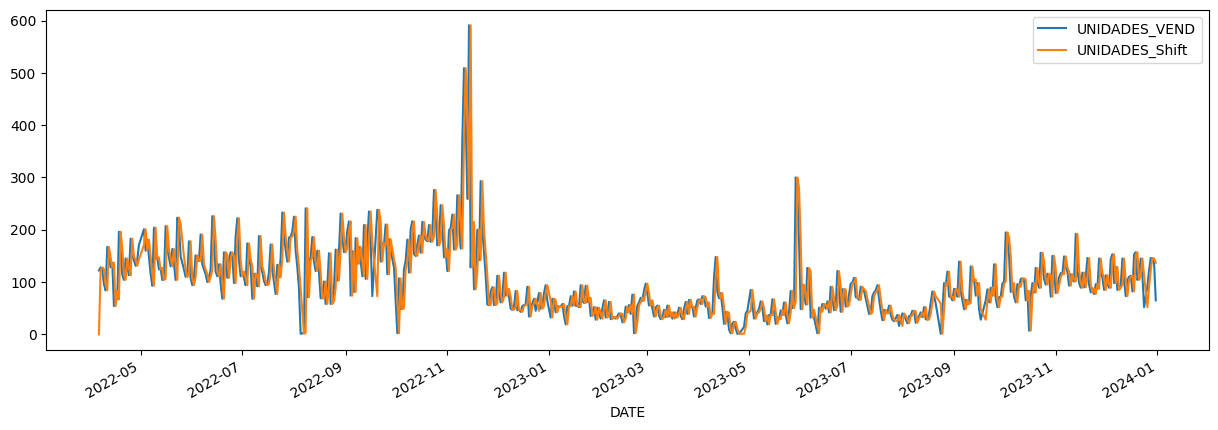

In [110]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind="line", x="DATE", y = ["UNIDADES_VEND","UNIDADES_Shift"]);

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

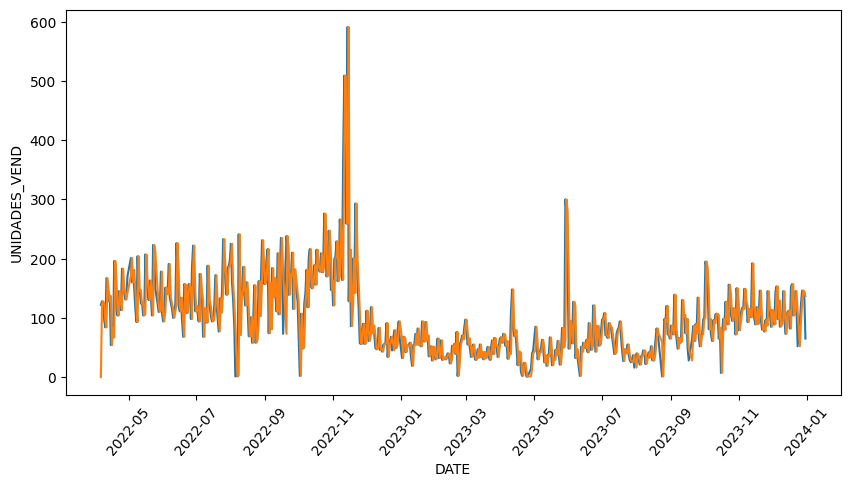

In [111]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_Shift']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [112]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[2,"Model"] = "Random"
dfResults.loc[2,"Forecast"] = df.UNIDADES_Shift[-1]
dfResults.loc[2,"RMSE"] = RMSE(df.UNIDADES_Shift, df.UNIDADES_VEND)
dfResults.head()

,Model,Forecast,RMSE
0,Mean,99.713128,64.143809
1,Linear,60.536387,60.029064
2,Random,137.0,49.570162


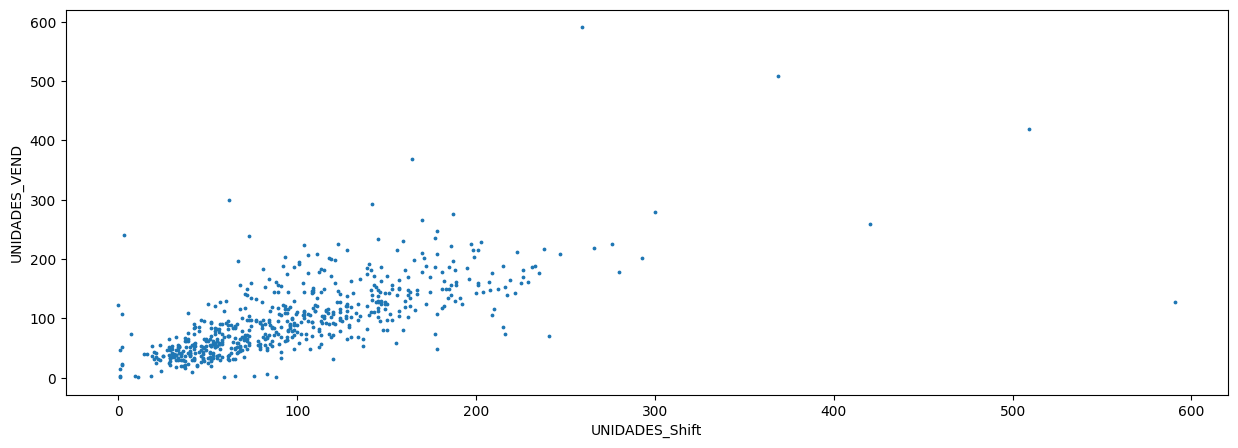

In [113]:
plt.rcParams['figure.figsize'] = (15, 5)
groupby_date.plot(kind= "scatter", y = "UNIDADES_VEND", x = "UNIDADES_Shift", s = 3);

In [114]:
df.tail()

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift
DATE,,,,,,,,,
2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630,61.030234,92.0
2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631,60.906772,123.0
2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632,60.783311,146.0
2023-12-30,581716,Q. MANT R BUENO L500,137,12,2023,99.713128,633,60.659849,145.0
2023-12-31,581716,Q. MANT R BUENO L500,65,12,2023,99.713128,634,60.536387,137.0


In [115]:
# Calculamos la media móvil de 3 días para suavizar los valores y ploteamos
df['UNIDADES_VEND3d'] = df.UNIDADES_VEND.rolling(window = '3d' ).mean()
df.head(793)

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift,UNIDADES_VEND3d
DATE,,,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029,0.0,122.000000
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0,125.000000
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0,125.000000
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0,116.333333
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0,101.666667
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630,61.030234,92.0,107.500000
2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631,60.906772,123.0,120.333333
2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632,60.783311,146.0,138.000000


(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

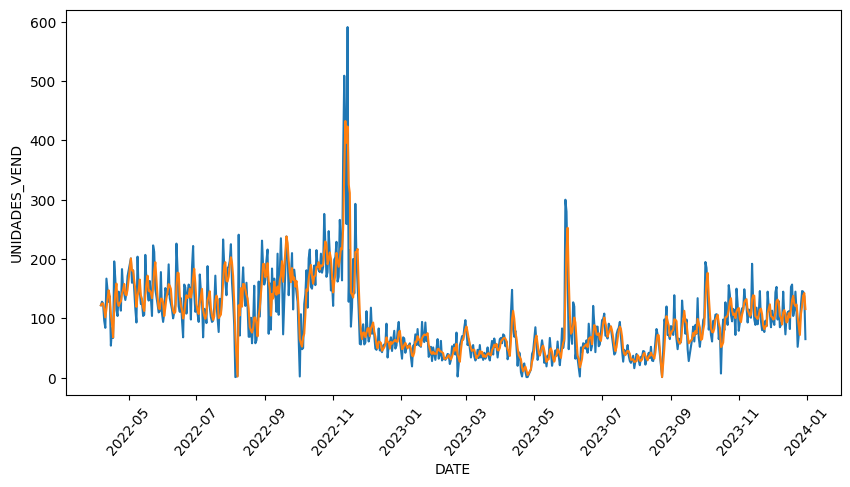

In [116]:
x = df.index
y = df['UNIDADES_VEND']
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = df['UNIDADES_VEND3d']
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [117]:
# Calculamos el RMSE y almacenamos los resultados
dfResults.loc[3,"Model"] = "Moving Average 3d"
dfResults.loc[3,"Forecast"] = df.UNIDADES_VEND3d[-1]
dfResults.loc[3,"RMSE"] = RMSE(df.UNIDADES_VEND3d, df.UNIDADES_VEND)
dfResults.head()

,Model,Forecast,RMSE
0,Mean,99.713128,64.143809
1,Linear,60.536387,60.029064
2,Random,137.0,49.570162
3,Moving Average 3d,115.666667,30.172282


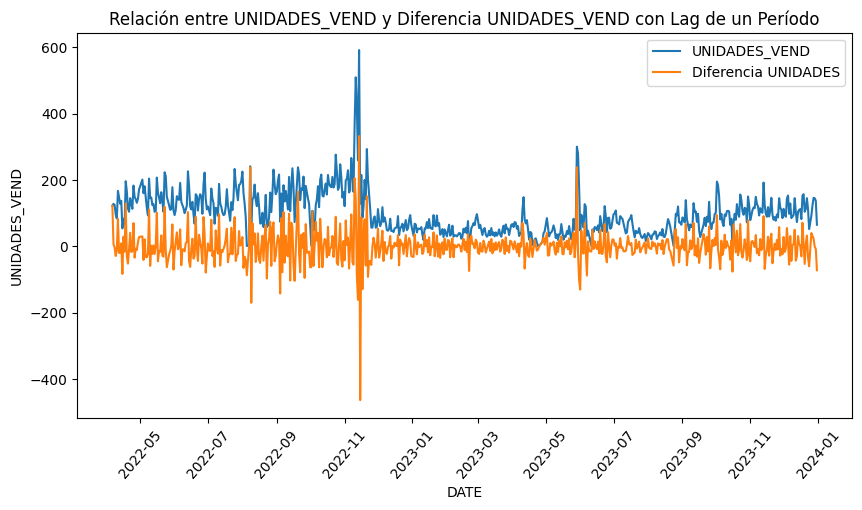

In [118]:
# Crear la columna de diferencias
df["UNIDADES_Diff"] = df.UNIDADES_VEND - df.UNIDADES_Shift

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_Diff']

fig, ax = plt.subplots(figsize=(10, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND')
sns.lineplot(x=x, y=y2, data=df, label='Diferencia UNIDADES')

# Añadir título
plt.title('Relación entre UNIDADES_VEND y Diferencia UNIDADES_VEND con Lag de un Período')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [119]:
ts = df.UNIDADES_VEND
ts_diff = df.UNIDADES_Diff
ts_diff.dropna(inplace = True)

In [120]:
# Importamos plots ACF y PACF
from statsmodels.tsa.stattools import acf, pacf

In [121]:
lag_acf = acf(ts_diff, nlags=50)
lag_acf

array([ 1.        , -0.36509244, -0.07528781,  0.01134418,  0.05281765,
       -0.11927152, -0.16358962,  0.30620859, -0.07856274, -0.06443999,
        0.02660114,  0.0354578 , -0.08351649, -0.03118103,  0.15982834,
       -0.12754008, -0.02359112,  0.06870414,  0.01694728, -0.07716552,
        0.01320113,  0.16997918, -0.14506711, -0.0673313 ,  0.11890451,
       -0.05323997, -0.0197583 ,  0.00712702,  0.13260503, -0.14639638,
        0.02594241,  0.04231684, -0.04905407, -0.03809043,  0.0599141 ,
        0.11229412, -0.15158118,  0.01332396,  0.05244446, -0.00212167,
       -0.11403228,  0.07843925,  0.05109456, -0.12201268,  0.04804764,
        0.04282549, -0.01585601, -0.01472437,  0.09296406, -0.08123644,
       -0.03148375])

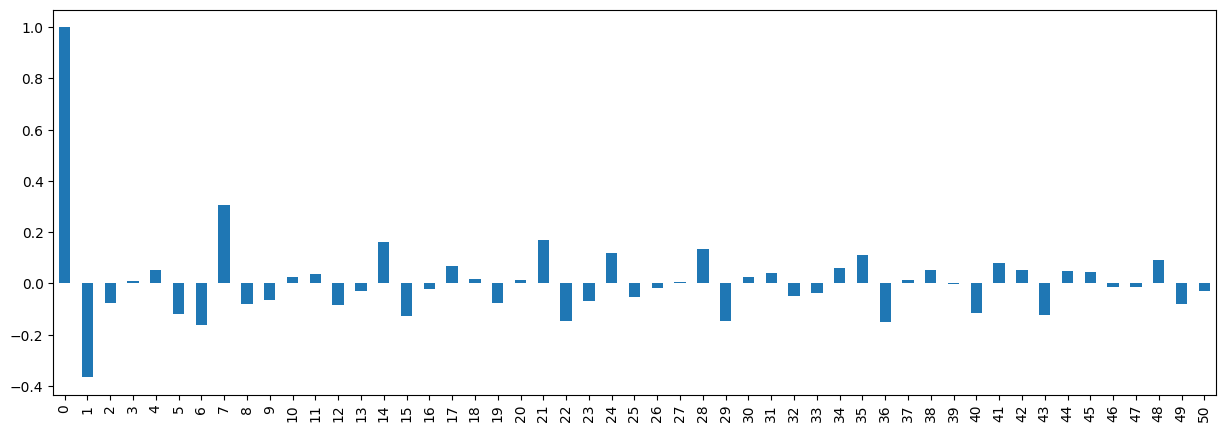

In [122]:
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar");

In [123]:
lag_pacf = pacf(ts_diff, nlags=50, method='ols');

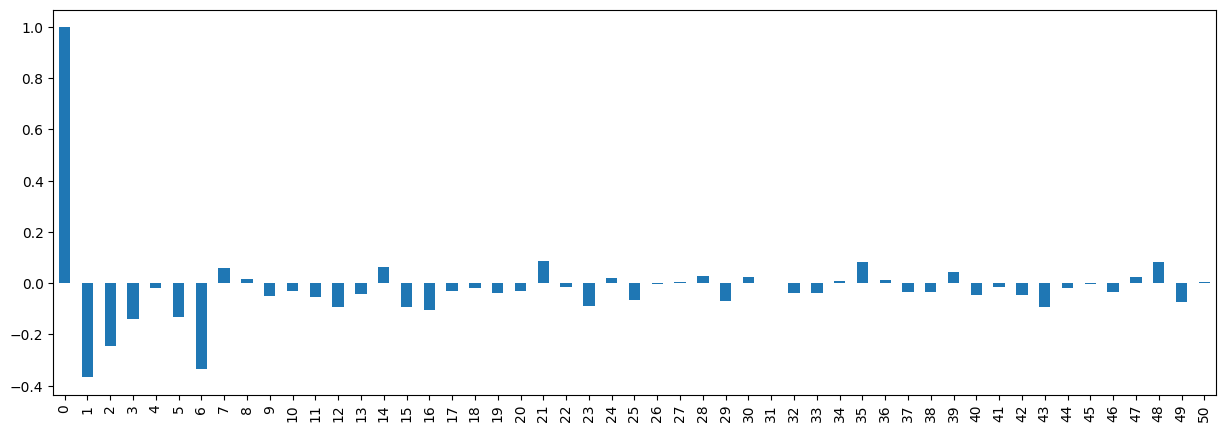

In [124]:
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar");

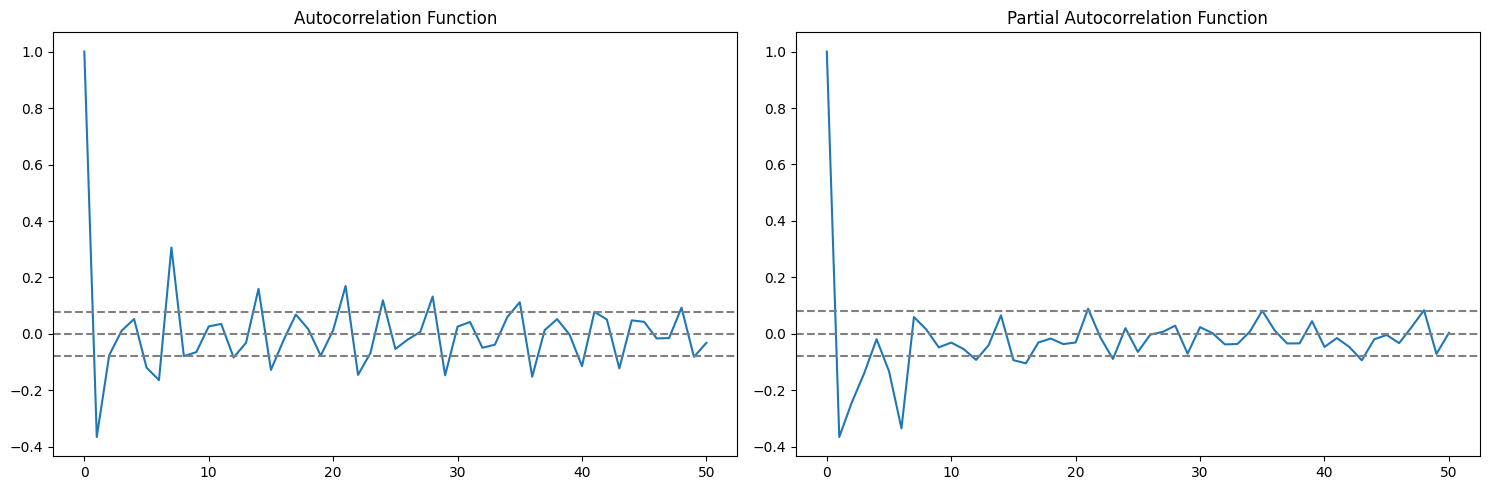

In [125]:
# Veamos qué parámetros son significativamente distintos de cero

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [126]:
import statsmodels.api as sm
ts.head()

DATE
2022-04-06    122
2022-04-07    128
2022-04-08    125
2022-04-09     96
2022-04-10     84
Name: UNIDADES_VEND, dtype: int64

In [127]:
# Instancio el modelo con parámetros (p=1,d=0,q=1) según el análisis de ACF y PACF
# En este caso d=0 porque trabajamos directamente con las diferencias
model_AR1MA = sm.tsa.arima.ARIMA(ts_diff, order=(7,0,7))

# Fiteo el modelo
results_ARIMA = model_AR1MA.fit()
results_ARIMA.fittedvalues.head()

/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ronaldverdugol/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

DATE
2022-04-06    -0.004265
2022-04-07   -45.455291
2022-04-08   -29.527910
2022-04-09   -15.636021
2022-04-10    10.334803
dtype: float64

In [128]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          UNIDADES_Diff   No. Observations:                  617
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -3152.313
Date:                Tue, 07 May 2024   AIC                           6336.625
Time:                        19:40:56   BIC                           6407.423
Sample:                             0   HQIC                          6364.151
                                - 617                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.421     -0.010      0.992      -0.830       0.822
ar.L1         -1.1303      0.129     -8.754      0.000      -1.383      -0.877
ar.L2         -1.3064      0.126    -10.360      0.0

(array([19113., 19174., 19236., 19297., 19358., 19417., 19478., 19539.,
        19601., 19662., 19723.]),
 [Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

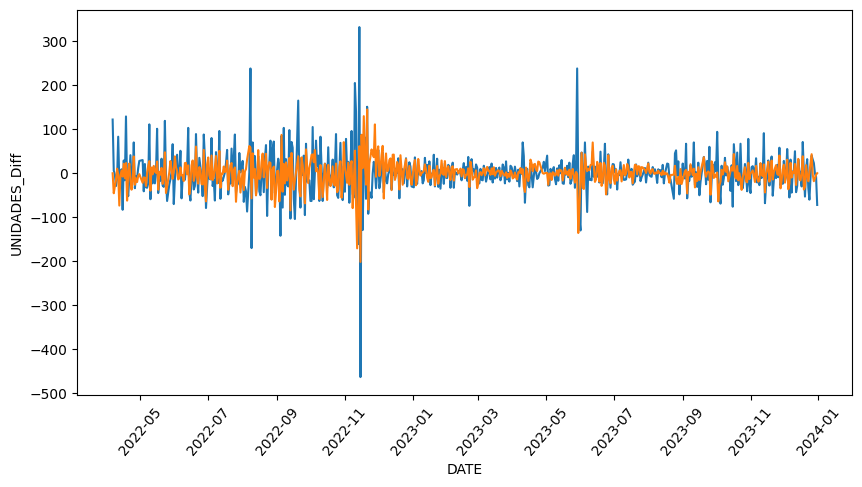

In [129]:
x = df.index
y = ts_diff
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x = x, y = y, data = df)
y = results_ARIMA.fittedvalues
sns.lineplot(x = x, y = y, data = df)
plt.xticks(rotation=50)

In [130]:
df.head()

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift,UNIDADES_VEND3d,UNIDADES_Diff
DATE,,,,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029,0.0,122.000000,122.0
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0,125.000000,6.0
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0,125.000000,-3.0
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0,116.333333,-29.0
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0,101.666667,-12.0


In [131]:
ts_diff.sum()

65.0

In [132]:
df['predictions_ARIMA_diff'] = pd.Series(results_ARIMA.fittedvalues, copy=True)
df.predictions_ARIMA_diff.head()

DATE
2022-04-06    -0.004265
2022-04-07   -45.455291
2022-04-08   -29.527910
2022-04-09   -15.636021
2022-04-10    10.334803
Name: predictions_ARIMA_diff, dtype: float64

In [133]:
df.tail()

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift,UNIDADES_VEND3d,UNIDADES_Diff,predictions_ARIMA_diff
DATE,,,,,,,,,,,,
2023-12-27,581716,Q. MANT R BUENO L500,123,12,2023,99.713128,630,61.030234,92.0,107.500000,31.0,-3.649936
2023-12-28,581716,Q. MANT R BUENO L500,146,12,2023,99.713128,631,60.906772,123.0,120.333333,23.0,-18.083347
2023-12-29,581716,Q. MANT R BUENO L500,145,12,2023,99.713128,632,60.783311,146.0,138.000000,-1.0,-11.453434
2023-12-30,581716,Q. MANT R BUENO L500,137,12,2023,99.713128,633,60.659849,145.0,142.666667,-8.0,-3.209863
2023-12-31,581716,Q. MANT R BUENO L500,65,12,2023,99.713128,634,60.536387,137.0,115.666667,-72.0,0.153023


In [134]:
ts_diff.head()

DATE
2022-04-06    122.0
2022-04-07      6.0
2022-04-08     -3.0
2022-04-09    -29.0
2022-04-10    -12.0
Name: UNIDADES_Diff, dtype: float64

In [135]:
predictions_ARIMA_diff = df.predictions_ARIMA_diff
predictions_ARIMA_diff.tail()

DATE
2023-12-27    -3.649936
2023-12-28   -18.083347
2023-12-29   -11.453434
2023-12-30    -3.209863
2023-12-31     0.153023
Name: predictions_ARIMA_diff, dtype: float64

In [136]:
ts.iloc[0]

122

In [137]:
predictions_ARIMA = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA.tail()

DATE
2023-12-27    118.350064
2023-12-28    103.916653
2023-12-29    110.546566
2023-12-30    118.790137
2023-12-31    122.153023
dtype: float64

In [138]:
# Guardamos nuestros resultados
df['UNIDADES_ARIMA'] = predictions_ARIMA

In [139]:
df['UNIDADES_ARIMA'].tail

<bound method NDFrame.tail of DATE
2022-04-06    121.995735
2022-04-07     76.544709
2022-04-08     92.472090
2022-04-09    106.363979
2022-04-10    132.334803
                 ...    
2023-12-27    118.350064
2023-12-28    103.916653
2023-12-29    110.546566
2023-12-30    118.790137
2023-12-31    122.153023
Name: UNIDADES_ARIMA, Length: 617, dtype: float64>

In [140]:
df['UNIDADES_VEND'].tail

<bound method NDFrame.tail of DATE
2022-04-06    122
2022-04-07    128
2022-04-08    125
2022-04-09     96
2022-04-10     84
             ... 
2023-12-27    123
2023-12-28    146
2023-12-29    145
2023-12-30    137
2023-12-31     65
Name: UNIDADES_VEND, Length: 617, dtype: int64>

In [141]:
# Incorporamos estimaciones y resultados a nuestro DF
dfResults.loc[4,"Model"] = "ARIMA"
dfResults.loc[4,"Forecast"] = df.UNIDADES_ARIMA[-1]
dfResults.loc[4,"RMSE"] = RMSE(df.predictions_ARIMA_diff, df.UNIDADES_Diff)



In [142]:
dfResults[["Model","RMSE"]]


,Model,RMSE
0,Mean,64.143809
1,Linear,60.029064
2,Random,49.570162
3,Moving Average 3d,30.172282
4,ARIMA,40.148469


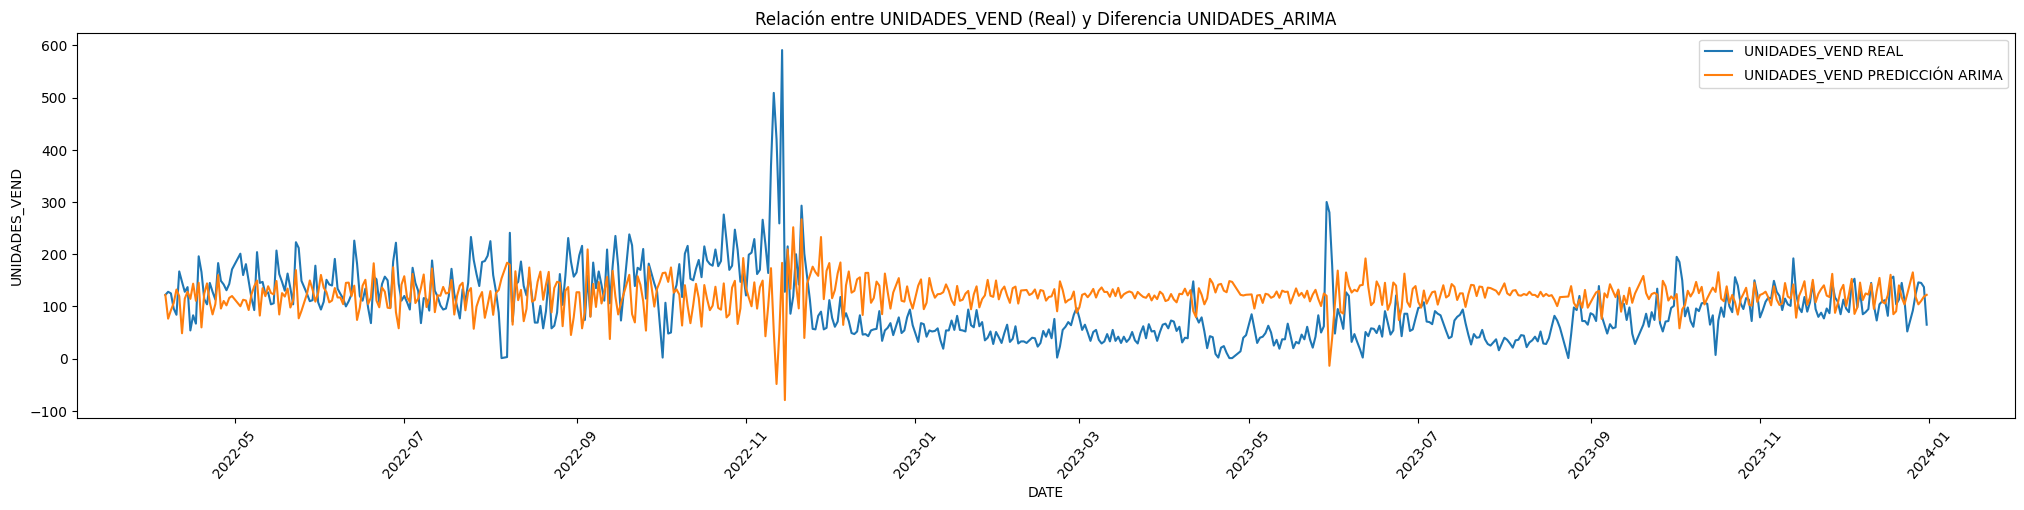

In [143]:

# Crear el gráfico de líneas
x = df.index
y1 = df['UNIDADES_VEND']
y2 = df['UNIDADES_ARIMA']

fig, ax = plt.subplots(figsize=(25, 5))

# Plotear las series de tiempo
sns.lineplot(x=x, y=y1, data=df, label='UNIDADES_VEND REAL')
sns.lineplot(x=x, y=y2, data=df, label='UNIDADES_VEND PREDICCIÓN ARIMA')

# Añadir título
plt.title('Relación entre UNIDADES_VEND (Real) y Diferencia UNIDADES_ARIMA')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=50)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [144]:
#df = df_bkp
#df = df.dropna()

In [145]:
df.shape

(617, 13)

In [146]:
#df =  df[df.item_nbr.isin([581716,657947,254100])]
df.head(10)

,item_nbr,item_desc_1,UNIDADES_VEND,MES,AÑO,UNIDADES_PROM,timeIndex,UNIDADES_Linear,UNIDADES_Shift,UNIDADES_VEND3d,UNIDADES_Diff,predictions_ARIMA_diff,UNIDADES_ARIMA
DATE,,,,,,,,,,,,,
2022-04-06,581716,Q. MANT R BUENO L500,122,4,2022,99.713128,0,138.811029,0.0,122.000000,122.0,-0.004265,121.995735
2022-04-07,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,1,138.687568,122.0,125.000000,6.0,-45.455291,76.544709
2022-04-08,581716,Q. MANT R BUENO L500,125,4,2022,99.713128,2,138.564106,128.0,125.000000,-3.0,-29.527910,92.472090
2022-04-09,581716,Q. MANT R BUENO L500,96,4,2022,99.713128,3,138.440645,125.0,116.333333,-29.0,-15.636021,106.363979
2022-04-10,581716,Q. MANT R BUENO L500,84,4,2022,99.713128,4,138.317183,96.0,101.666667,-12.0,10.334803,132.334803
2022-04-11,581716,Q. MANT R BUENO L500,167,4,2022,99.713128,5,138.193721,84.0,115.666667,83.0,-2.437436,119.562564
2022-04-12,581716,Q. MANT R BUENO L500,147,4,2022,99.713128,6,138.070260,167.0,132.666667,-20.0,-73.420954,48.579046
2022-04-13,581716,Q. MANT R BUENO L500,128,4,2022,99.713128,7,137.946798,147.0,147.333333,-19.0,-6.944079,115.055921
2022-04-14,581716,Q. MANT R BUENO L500,137,4,2022,99.713128,8,137.823337,128.0,137.333333,9.0,6.278312,128.278312
